In [58]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.time import Time
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
%matplotlib widget

#######################################################################################################
### read ACC SF result file
#######################################################################################################
SF_data = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability/ACC SF result.csv')

SF_name = SF_data.name
D1000_3 = SF_data.D1000_3.values
D1000_uperr_3 = SF_data.D1000_uperr_3.values
D1000_lowerr_3 = SF_data.D1000_lowerr_3.values
D1000_6 = SF_data.D1000_6.values
D1000_uperr_6 = SF_data.D1000_uperr_6.values
D1000_lowerr_6 = SF_data.D1000_lowerr_6.values
D1000_7 = SF_data.D1000_7.values
D1000_uperr_7 = SF_data.D1000_uperr_7.values
D1000_lowerr_7 = SF_data.D1000_lowerr_7.values
tauchar_3 = SF_data.tau_char_3.values
tauchar_uperr_3 = SF_data.tauchar_uperror_3.values
tauchar_lowerr_3 = SF_data.tauchar_lowerror_3.values
tauchar_6 = SF_data.tau_char_6.values
tauchar_uperr_6 = SF_data.tauchar_uperror_6.values
tauchar_lowerr_6= SF_data.tauchar_lowerror_6.values
tauchar_7 = SF_data.tau_char_7.values
tauchar_uperr_7 = SF_data.tauchar_uperror_7.values
tauchar_lowerr_7 = SF_data.tauchar_lowerror_7.values
l = SF_data.gla_l.values
b = SF_data.gla_b.values
SF_z = SF_data.z.values
size_2 = SF_data.theta_2.values
size_5 = SF_data.theta_5.values
size_8 = SF_data.theta_8.values
size_15 = SF_data.theta_15.values
size_24 = SF_data.theta_24.values
size_43 = SF_data.theta_43.values
#######################################################################################################
### convert apparent source size to actural source size
act_size_2 = size_2*(1+SF_z)
act_size_5 = size_5*(1+SF_z)
act_size_8 = size_8*(1+SF_z)
act_size_15 = size_15*(1+SF_z)
act_size_24 = size_24*(1+SF_z)
act_size_43 = size_43*(1+SF_z)

### convert characteristic timescale to actual timescale
tausrc_3 = tauchar_3*(1+SF_z)
tausrc_6 = tauchar_6*(1+SF_z)
tausrc_7 = tauchar_7*(1+SF_z)

tausrc_uperr_3 = tauchar_uperr_3*(1+SF_z)
tausrc_uperr_6 = tauchar_uperr_6*(1+SF_z)
tausrc_uperr_7 = tauchar_uperr_7*(1+SF_z)

tausrc_lowerr_3 = tauchar_lowerr_3*(1+SF_z)
tausrc_lowerr_6 = tauchar_lowerr_6*(1+SF_z)
tausrc_lowerr_7 = tauchar_lowerr_7*(1+SF_z)

#######################################################################################################
### read spectra index file
#######################################################################################################
specind = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability/spectral index.csv')

specind_Name = specind.Name
RA = specind.RA
DEC = specind.DEC
z = specind.z
cla = specind.class_name
alpha = specind.alpha
alphaRad = specind.alphaRad
alphaK = specind.alphaK
alphaRadK = specind.alphaRadK

#######################################################################################################
### find overlap sources of SF file (# = 40) and spectral index file (BZCAT Xmatch ACC, # = 1367)
#######################################################################################################
namelist = list(set(SF_name))
name_index = [[np.nan]*1]*len(namelist) 
# put index of each source into an array
for i in range(0, len(namelist)):
    name_index[i] =  np.where( (specind_Name == namelist[i]).values == True )[0][0]
# extract value of overlap sources
alpha = alpha[ name_index ].values
alphaRad = alphaRad[ name_index ].values
alphaK = alphaK[ name_index ].values
alphaRadK = alphaRadK[ name_index ].values

#######################################################################################################
classnameall = []
QSOind = []
BL_Lac_can_ind = []
BL_Lac_galaxy_dom_ind = []
BL_Lac_ind = []
Blazar_ind = []
classclassify = [Blazar_ind, BL_Lac_can_ind, BL_Lac_galaxy_dom_ind, QSOind, BL_Lac_ind]
# there is a blank in "Blazar Uncertain type" 
# NOT REMOVE IT
classnameall  = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac'] 
    
for j in range(0, 5): # 1367
    classclassify[j] = np.where( cla[ name_index ].values == classnameall[j] )[0]
        
#######################################################################################################
z_overlap = np.array(z[ name_index ])

z1 = np.where((0 < z_overlap) & (z_overlap < 1))[0]
z2 = np.where((z_overlap >= 1) & (z_overlap < 2))[0]
z3 = np.where(z_overlap >= 2)[0]
z4 = np.where((0 < z_overlap) & (z_overlap < 1.5))[0]
z5 = np.where(z_overlap >= 1.5)[0]

zsep = [z1, z2, z3, z4, z5]

zsepname = ['0<z<1, N = '+str(len(z1)), '1$\leq$z<2, N = '+str(len(z2)), 'z$\geq$2, N = '+str(len(z3)), '0<z<1.5, N = '+str(len(z4)), 'z$\geq$1.5, N = '+str(len(z5))]
#######################################################################################################
### read modulation index file
#######################################################################################################
moduind = pd.read_csv('/Users/87steven/Documents/ASIAA/ACC variability/modulation index_ge30.csv')

moduind_Name = moduind.Name
modu_index_3 = moduind.modu_index_3
modu_index_6 = moduind.modu_index_6
modu_index_7 = moduind.modu_index_7

#######################################################################################################
### find overlap sources of SF file (# = 40) and modulation index file (# = 1367)
#######################################################################################################
namelist = list(set(SF_name))
name_index = [[np.nan]*1]*len(namelist) 
# put index of each source into an array
for i in range(0, len(namelist)):
    name_index[i] =  np.where( (moduind_Name == namelist[i]).values == True )[0][0]
# extract value of overlap sources
modu_index_3_over = modu_index_3[ name_index ].values
modu_index_6_over = modu_index_6[ name_index ].values
modu_index_7_over = modu_index_7[ name_index ].values

#######################################################################################################
### defind parameter array
#######################################################################################################
color = ['red', 'green', 'blue', 'orange', 'black', 'pink', 'gray']
label_name = ['band 3', 'band 6', 'band 7']
Band_num = [3, 6, 7]


In [ ]:
#######################################################################################################
### Redshift against Modulation index
#######################################################################################################
modu_index = [modu_index_3, modu_index_6, modu_index_7]



for k in range(0, 3):

    aa = ~np.isnan(z) & ~np.isnan(modu_index[k])
    notnan = np.where(aa == True)[0]
    
    notnan_z = z[notnan]
    notnan_modu_index = modu_index[k][notnan].values
     
    tau, p = stats.kendalltau(notnan_z, notnan_modu_index)
    
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()
    
    ax.plot(notnan_z, notnan_modu_index, '.', c = 'red', markersize = 6)
    
    ax.text(0.1, np.nanmax(notnan_modu_index), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
            verticalalignment = 'top', fontsize = 12)

    ax.set_xlim(0, np.nanmax(notnan_z)*1.1)
    ax.set_ylim(0, np.nanmax(notnan_modu_index)*1.1)
    plt.xlabel('Redshift (z)',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('Modulation Index',  fontsize = 16)
    plt.yticks(fontsize = 14)
    plt.title('Band '+str(Band_num[k])+' Modulation Index \nAgainst Redshift of All Sources', fontsize = 20)


In [ ]:
#######################################################################################################
### D(1000d) against Modulation index
#######################################################################################################
D1000 = [D1000_3, D1000_6, D1000_7]
D1000_uperr = [D1000_uperr_3, D1000_uperr_6, D1000_uperr_7]
D1000_lowerr = [D1000_lowerr_3, D1000_lowerr_6, D1000_lowerr_7]

modu_index = [modu_index_3_over, modu_index_6_over, modu_index_7_over]

Band_num = [3, 6, 7]

for k in range(0, 3):
    up_err = [ D1000_uperr[k]-D1000[k] ]
    low_err = [ D1000[k]-D1000_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()

    aa = ~np.isnan(D1000[k]) & ~np.isnan(modu_index[k])
    notnan = np.where(aa == True)[0]
    
    notnan_modu_index = modu_index[k][notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(notnan_modu_index, notnan_D1000)
    
    ax.plot(notnan_modu_index, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(notnan_modu_index)):
        ax.errorbar(notnan_modu_index[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    ax.set_xlim(0.1, np.nanmax(notnan_modu_index)*1.1)
    ax.set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    plt.xlabel('Modulation Index',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('SF Amplitude $D(1000\mathrm{d})$',  fontsize = 16)
    plt.yticks(fontsize = 14)
    ax.text(np.nanmax(notnan_modu_index)*0.8, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
            verticalalignment = 'top', fontsize = 14)
    plt.title('Band '+str(Band_num[k])+' SF Amplitude $D(1000\mathrm{d})$ \nAgainst Modulation Index of All Sources', fontsize = 20)


In [ ]:
#######################################################################################################
### D(1000d) against Modulation index (BL Lac and QSO)
#######################################################################################################
BL_Lac = np.hstack([classclassify[1],classclassify[2], classclassify[4]])
QSO = classclassify[3]

BL_Lac_D1000 = [D1000_3[BL_Lac], D1000_6[BL_Lac], D1000_7[BL_Lac]]
BL_Lac_D1000_uperr = [D1000_uperr_3[BL_Lac], D1000_uperr_6[BL_Lac], D1000_uperr_7[BL_Lac]]
BL_Lac_D1000_lowerr = [D1000_lowerr_3[BL_Lac], D1000_lowerr_6[BL_Lac], D1000_lowerr_7[BL_Lac]]

QSO_D1000 = [D1000_3[QSO], D1000_6[QSO], D1000_7[QSO]]
QSO_D1000_uperr = [D1000_uperr_3[QSO], D1000_uperr_6[QSO], D1000_uperr_7[QSO]]
QSO_D1000_lowerr = [D1000_lowerr_3[QSO], D1000_lowerr_6[QSO], D1000_lowerr_7[QSO]]

D1000_array = [BL_Lac_D1000, QSO_D1000]
D1000_uperr_array = [BL_Lac_D1000_uperr, QSO_D1000_uperr]
D1000_lowerr_array = [BL_Lac_D1000_lowerr, QSO_D1000_lowerr]

BL_Lac_modu_index = [modu_index_3_over[BL_Lac], modu_index_6_over[BL_Lac], modu_index_7_over[BL_Lac]]
QSO_modu_index = [modu_index_3_over[QSO], modu_index_6_over[QSO], modu_index_7_over[QSO]]

modu_index_array = [BL_Lac_modu_index, QSO_modu_index]

Band_num = [3, 6, 7]
class_name = ['BL Lac', 'QSO']

for j in range(0, 2):
    modu_index = modu_index_array[j]
    D1000 = D1000_array[j]
    D1000_uperr = D1000_uperr_array[j]
    D1000_lowerr = D1000_lowerr_array[j]
    for k in range(0, 3):
        up_err = [ D1000_uperr[k]-D1000[k] ]
        low_err = [ D1000[k]-D1000_lowerr[k] ]
        y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

        plt.rcParams['figure.figsize'] = [10, 7.5]
        plt.rcParams['axes.linewidth'] = 3    
        fig, ax = plt.subplots()

        aa = ~np.isnan(D1000[k]) & ~np.isnan(modu_index[k])
        notnan = np.where(aa == True)[0]
    
        notnan_modu_index = modu_index[k][notnan]
        notnan_D1000 = D1000[k][notnan]
    
        tau, p = stats.kendalltau(notnan_modu_index, notnan_D1000)
    
        ax.plot(notnan_modu_index, notnan_D1000, '.', c = 'red', markersize = 6)
        for i in range(0, len(notnan_modu_index)):
            ax.errorbar(notnan_modu_index[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

        ax.set_xlim(0.15, np.nanmax(notnan_modu_index)*1.1)
        ax.set_ylim(0, np.nanmax(notnan_D1000)*1.1)
        plt.xlabel('Modulation Index',  fontsize = 16)
        plt.xticks(fontsize = 14)
        plt.ylabel('SF Amplitude $D(1000\mathrm{d})$',  fontsize = 16)
        plt.yticks(fontsize = 14)
        ax.text(np.nanmax(notnan_modu_index)*0.8, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
                verticalalignment = 'top', fontsize = 12)
        plt.title(class_name[j] + ' Band '+str(Band_num[k])+' SF Amplitude $D(1000\mathrm{d})$ \nAgainst Modulation Index', fontsize = 20)

/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_86811/2143465974.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


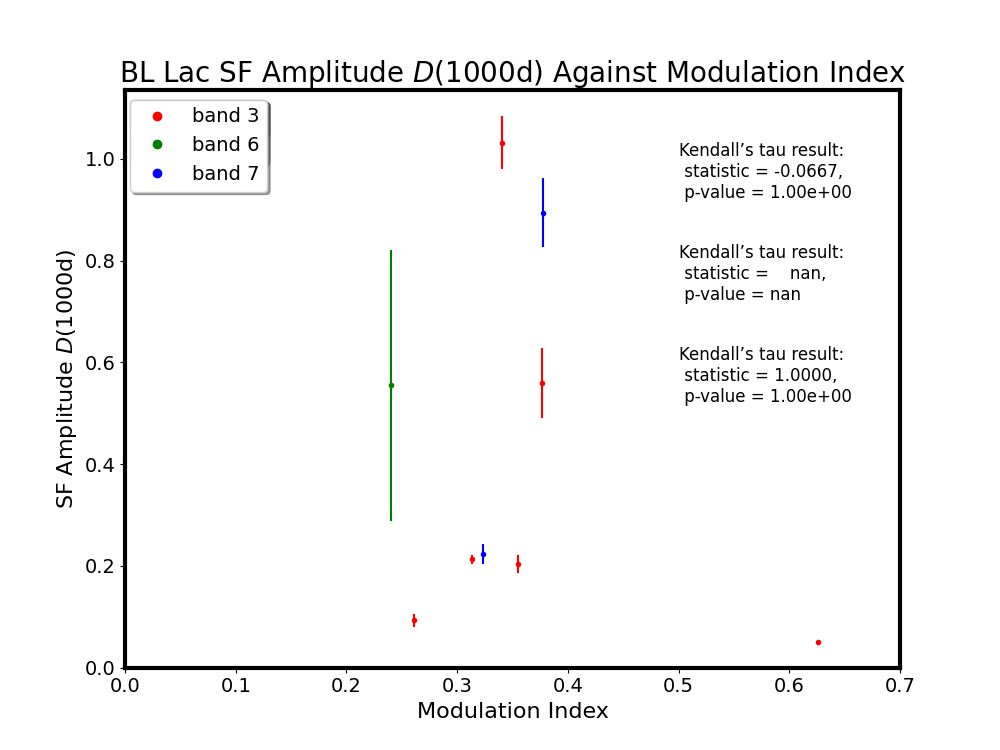

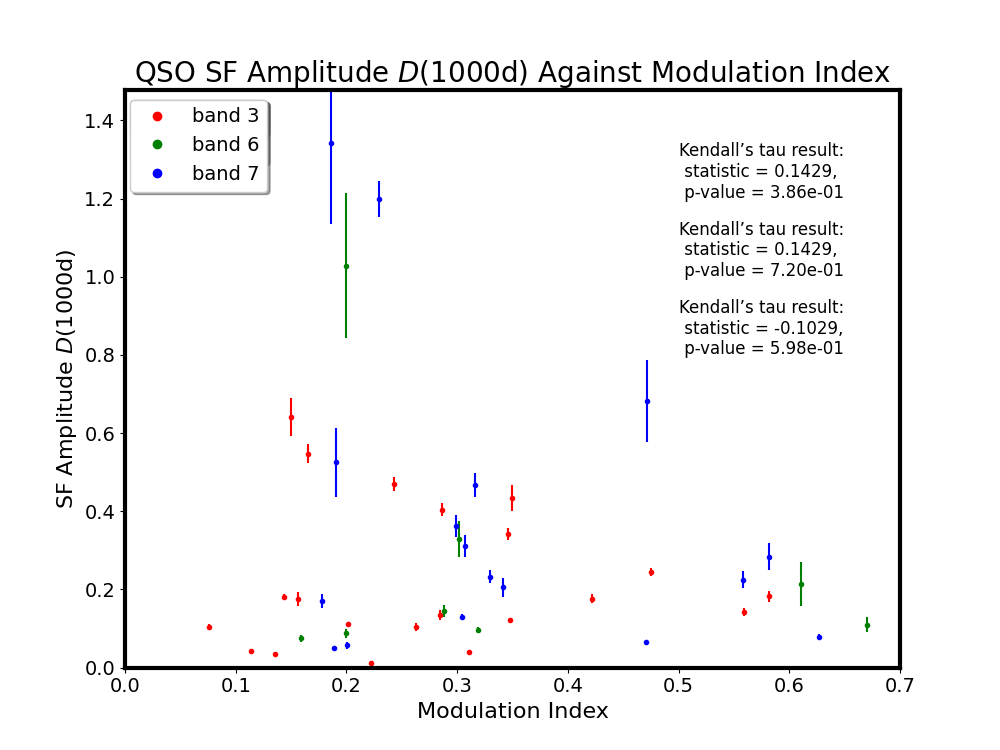

In [64]:
#######################################################################################################
### D(1000d) against Modulation index (BL Lac and QSO)
#######################################################################################################
BL_Lac = np.hstack([classclassify[1],classclassify[2], classclassify[4]])
QSO = classclassify[3]

BL_Lac_D1000 = [D1000_3[BL_Lac], D1000_6[BL_Lac], D1000_7[BL_Lac]]
BL_Lac_D1000_uperr = [D1000_uperr_3[BL_Lac], D1000_uperr_6[BL_Lac], D1000_uperr_7[BL_Lac]]
BL_Lac_D1000_lowerr = [D1000_lowerr_3[BL_Lac], D1000_lowerr_6[BL_Lac], D1000_lowerr_7[BL_Lac]]

QSO_D1000 = [D1000_3[QSO], D1000_6[QSO], D1000_7[QSO]]
QSO_D1000_uperr = [D1000_uperr_3[QSO], D1000_uperr_6[QSO], D1000_uperr_7[QSO]]
QSO_D1000_lowerr = [D1000_lowerr_3[QSO], D1000_lowerr_6[QSO], D1000_lowerr_7[QSO]]

D1000_array = [BL_Lac_D1000, QSO_D1000]
D1000_uperr_array = [BL_Lac_D1000_uperr, QSO_D1000_uperr]
D1000_lowerr_array = [BL_Lac_D1000_lowerr, QSO_D1000_lowerr]

BL_Lac_modu_index = [modu_index_3_over[BL_Lac], modu_index_6_over[BL_Lac], modu_index_7_over[BL_Lac]]
QSO_modu_index = [modu_index_3_over[QSO], modu_index_6_over[QSO], modu_index_7_over[QSO]]

modu_index_array = [BL_Lac_modu_index, QSO_modu_index]

Band_num = [3, 6, 7]
class_name = ['BL Lac', 'QSO']
label_name = ['band 3', 'band 6', 'band 7']

for j in range(0, 2):
    modu_index = modu_index_array[j]
    D1000 = D1000_array[j]
    D1000_uperr = D1000_uperr_array[j]
    D1000_lowerr = D1000_lowerr_array[j]
    
    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()
        
    for k in range(0, 3):
        up_err = [ D1000_uperr[k]-D1000[k] ]
        low_err = [ D1000[k]-D1000_lowerr[k] ]
        y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

        aa = ~np.isnan(D1000[k]) & ~np.isnan(modu_index[k])
        notnan = np.where(aa == True)[0]
    
        notnan_modu_index = modu_index[k][notnan]
        notnan_D1000 = D1000[k][notnan]
    
        tau, p = stats.kendalltau(notnan_modu_index, notnan_D1000)
    
        ax.plot(notnan_modu_index, notnan_D1000, '.', c = color[k], markersize = 6, label = label_name[k])
        for i in range(0, len(notnan_modu_index)):
            ax.errorbar(notnan_modu_index[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = color[k])

        ax.text(0.5, np.nanmax([item for sublist in D1000_array[j] for item in sublist])-0.2*k, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
                verticalalignment = 'top', fontsize = 12)
            
        ax.set_xlim(0., 0.7)
        ax.set_ylim(0, np.nanmax([item for sublist in D1000_array[j] for item in sublist])*1.1)
        plt.xlabel('Modulation Index',  fontsize = 16)
        plt.xticks(fontsize = 14)
        plt.ylabel('SF Amplitude $D(1000\mathrm{d})$',  fontsize = 16)
        plt.yticks(fontsize = 14)        
        fig.legend(loc='upper left', bbox_to_anchor = (0.12, 0.88), shadow=True, fontsize = 14, markerscale = 2) 
        plt.title(class_name[j] +' SF Amplitude $D(1000\mathrm{d})$ Against Modulation Index', fontsize = 20)

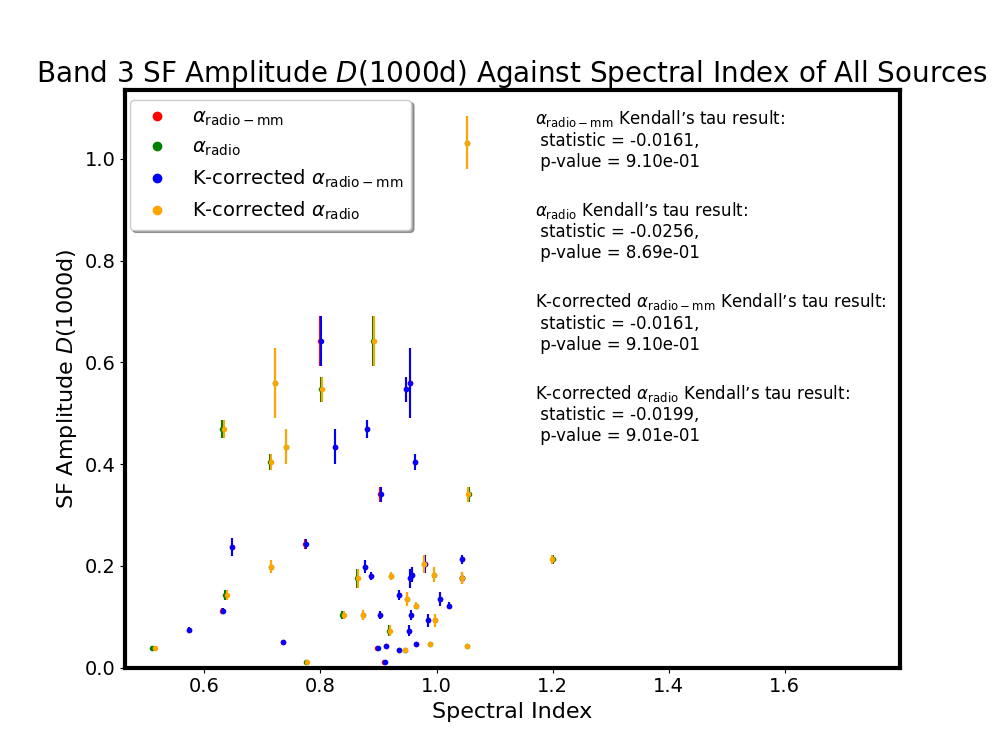

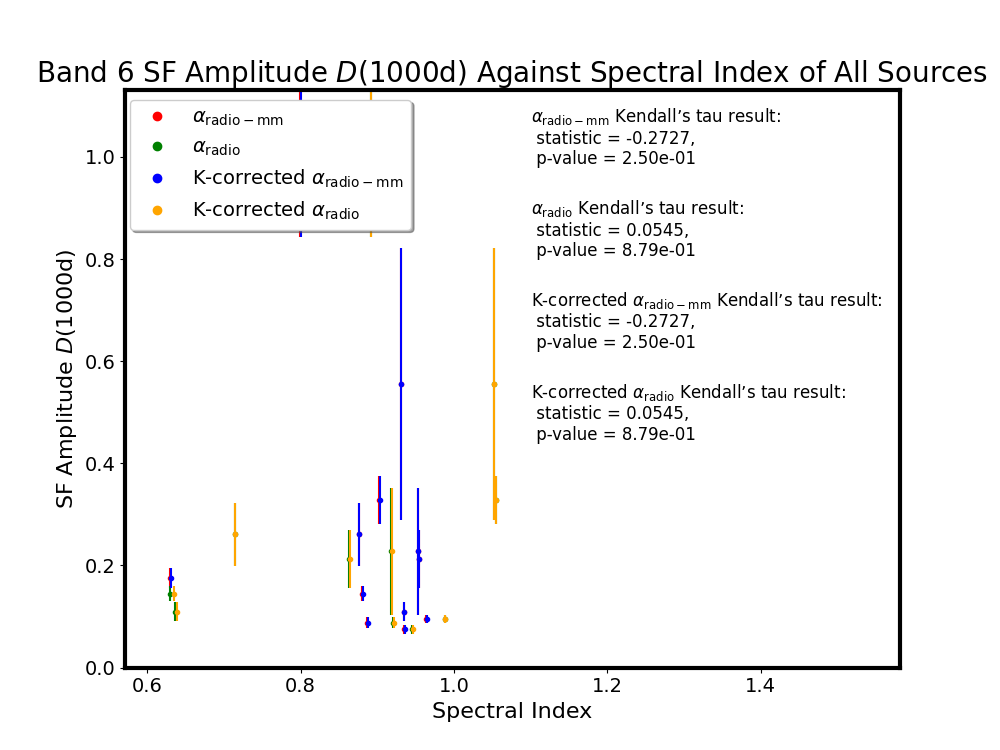

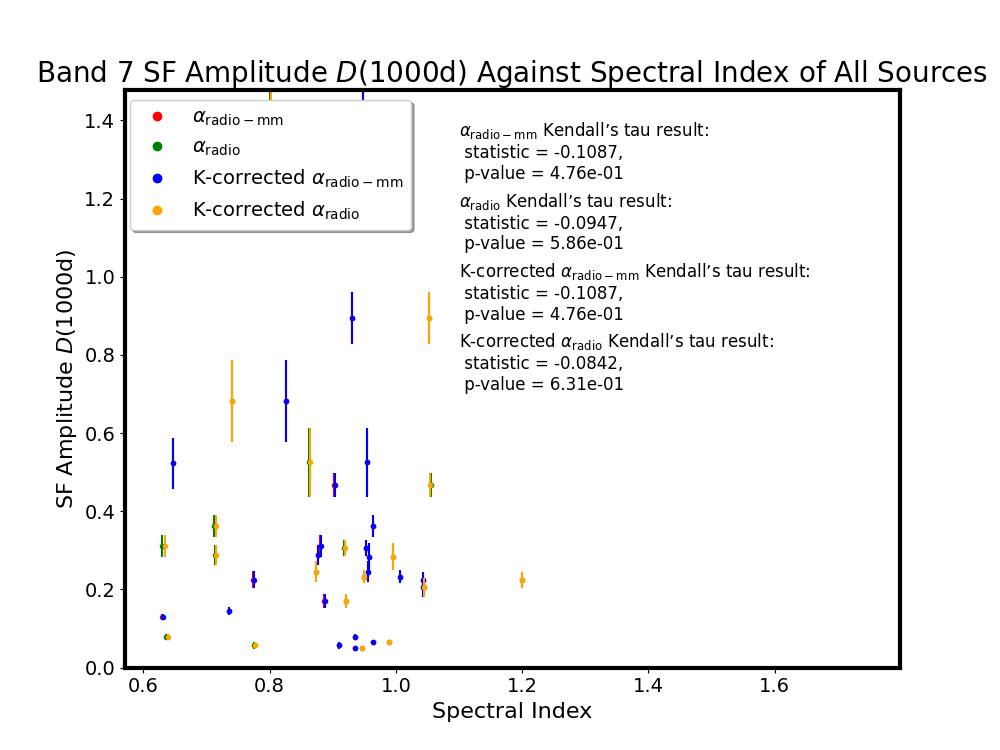

In [65]:
#######################################################################################################
### D(1000d) against Spectral index 
#######################################################################################################
spectral_index = [alpha, alphaRad, alphaK, alphaRadK]

D1000 = [D1000_3, D1000_6, D1000_7]
D1000_uperr = [D1000_uperr_3, D1000_uperr_6, D1000_uperr_7]
D1000_lowerr = [D1000_lowerr_3, D1000_lowerr_6, D1000_lowerr_7]

Band_num = [3, 6, 7]
x_axis = [1.17, 1.1, 1.1]
y_axis = [1.1, 1.1, 1.4]

label_name = ['$\\alpha_\mathrm{radio-mm}$', '$\\alpha_\mathrm{radio}$', 'K-corrected $\\alpha_\mathrm{radio-mm}$', 'K-corrected $\\alpha_\mathrm{radio}$' ]

for k in range(0, 3):
    up_err = [ D1000_uperr[k]-D1000[k] ]
    low_err = [ D1000[k]-D1000_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [10, 7.5]
    plt.rcParams['axes.linewidth'] = 3    
    fig, ax = plt.subplots()

    for j in range(0, 4):
        aa = ~np.isnan(D1000[k]) & ~np.isnan(spectral_index[j])
        notnan = np.where(aa == True)[0]
    
        notnan_spec_index = spectral_index[j][notnan]
        notnan_D1000 = D1000[k][notnan]
    
        tau, p = stats.kendalltau(notnan_spec_index, notnan_D1000)
    
        ax.plot(notnan_spec_index, notnan_D1000, '.', c = color[j], markersize = 6, label = label_name[j])
        for i in range(0, len(notnan_spec_index)):
            ax.errorbar(notnan_spec_index[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = color[j])
            
        ax.text(x_axis[k], y_axis[k]-0.18*j, label_name[j] + ' Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
            verticalalignment = 'top', fontsize = 12)

    ax.set_xlim(np.nanmin(notnan_spec_index)*0.9, np.nanmax(notnan_spec_index)*1.5)
    ax.set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    plt.xlabel('Spectral Index',  fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.ylabel('SF Amplitude $D(1000\mathrm{d})$',  fontsize = 16)
    plt.yticks(fontsize = 14)      
    fig.legend(loc='upper left', bbox_to_anchor = (0.12, 0.88), shadow=True, fontsize = 14, markerscale = 2) 
    plt.title('Band '+str(Band_num[k])+' SF Amplitude $D(1000\mathrm{d})$ Against Spectral Index of All Sources', fontsize = 20) 

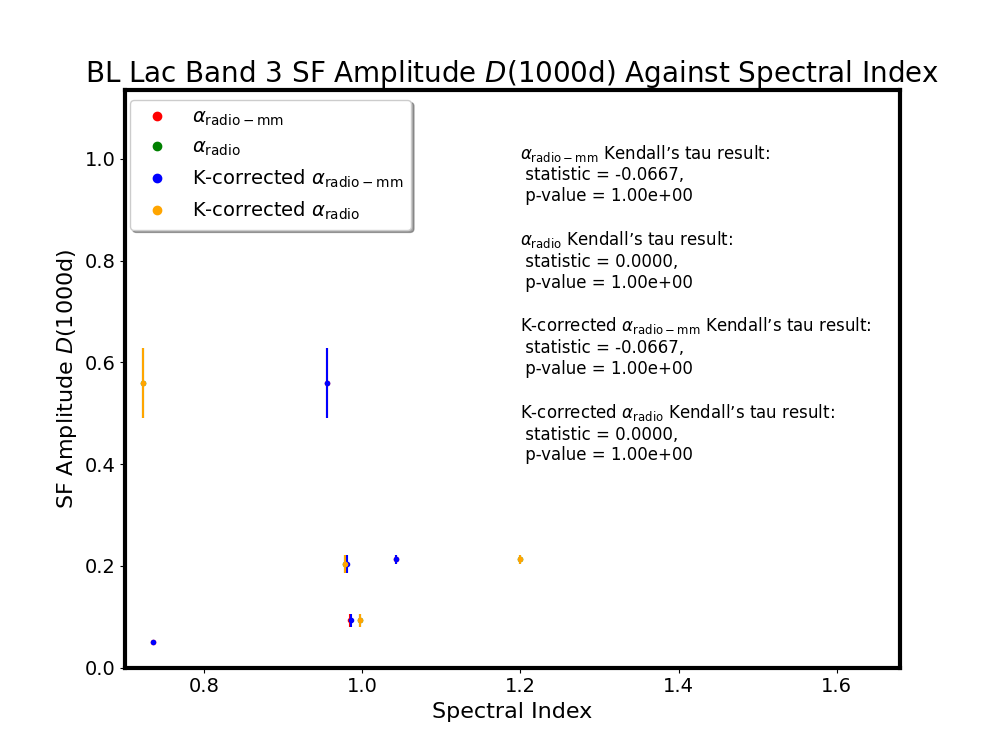

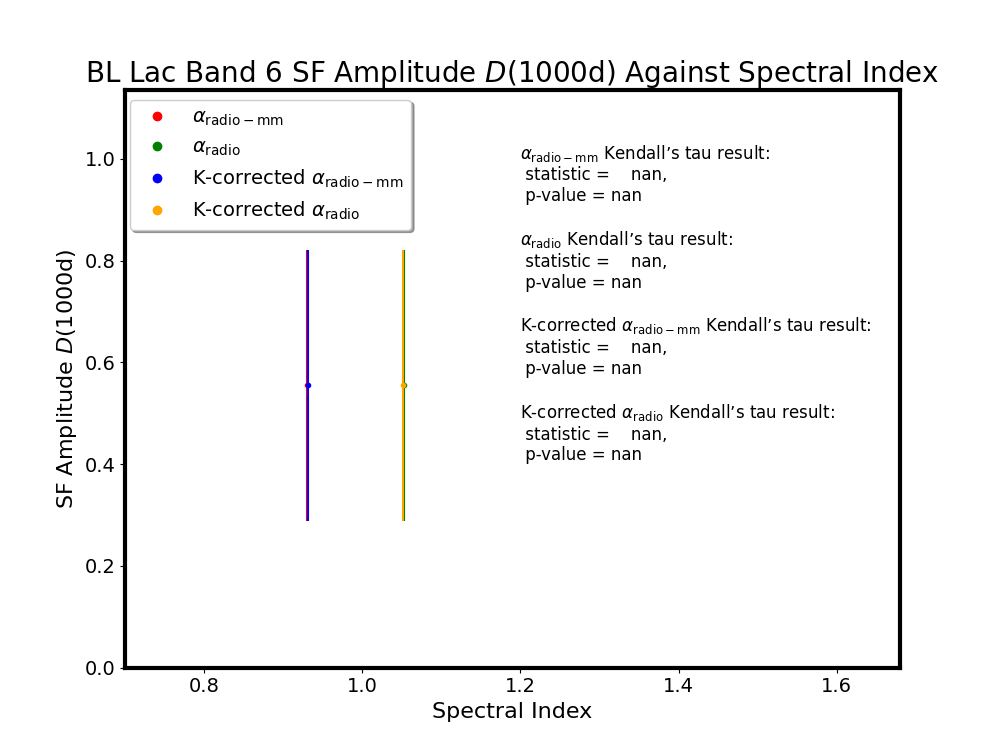

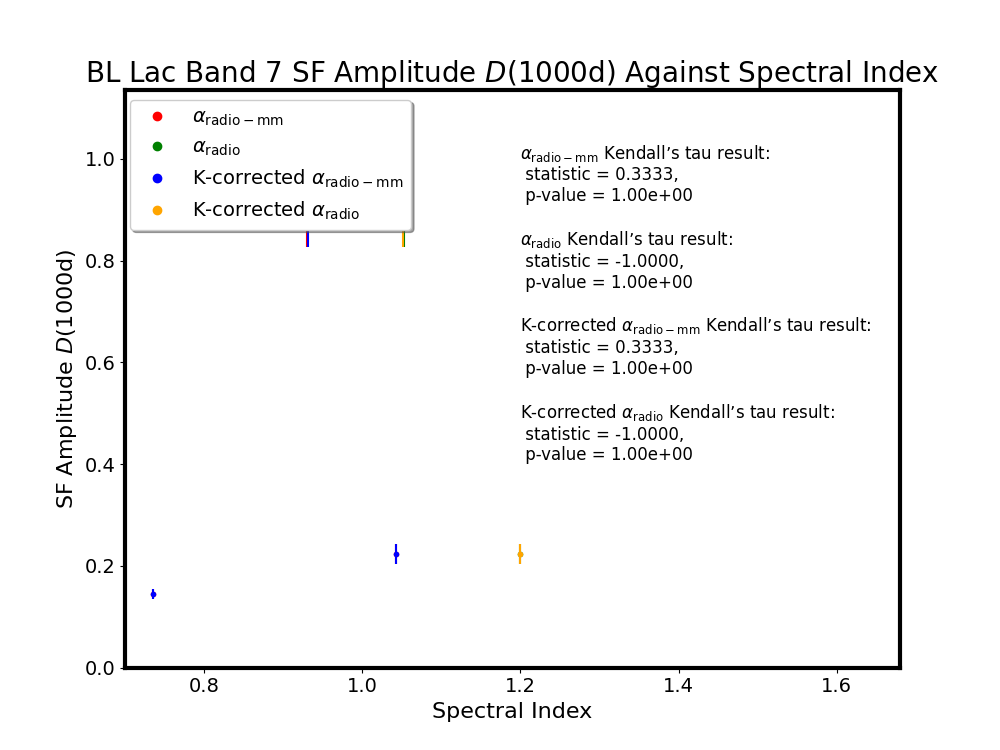

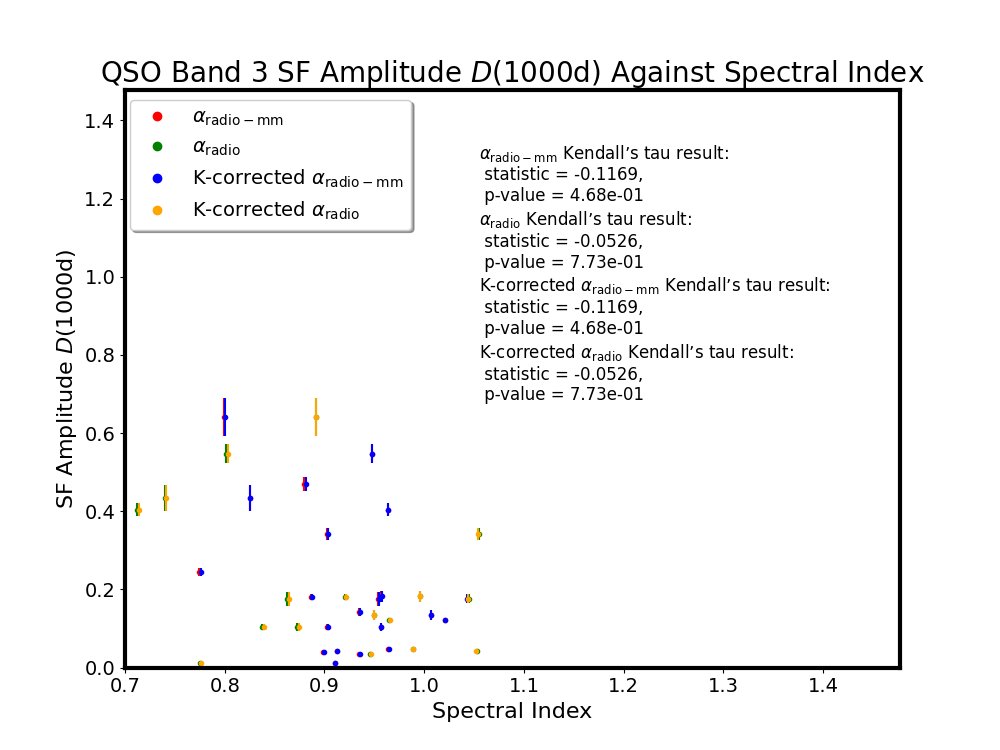

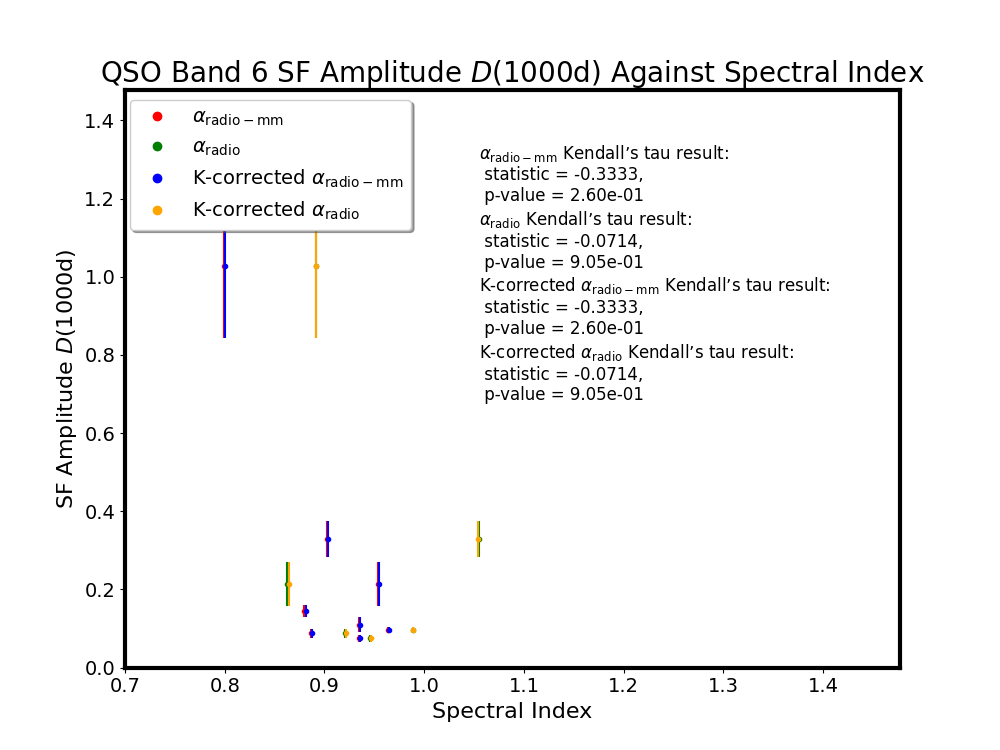

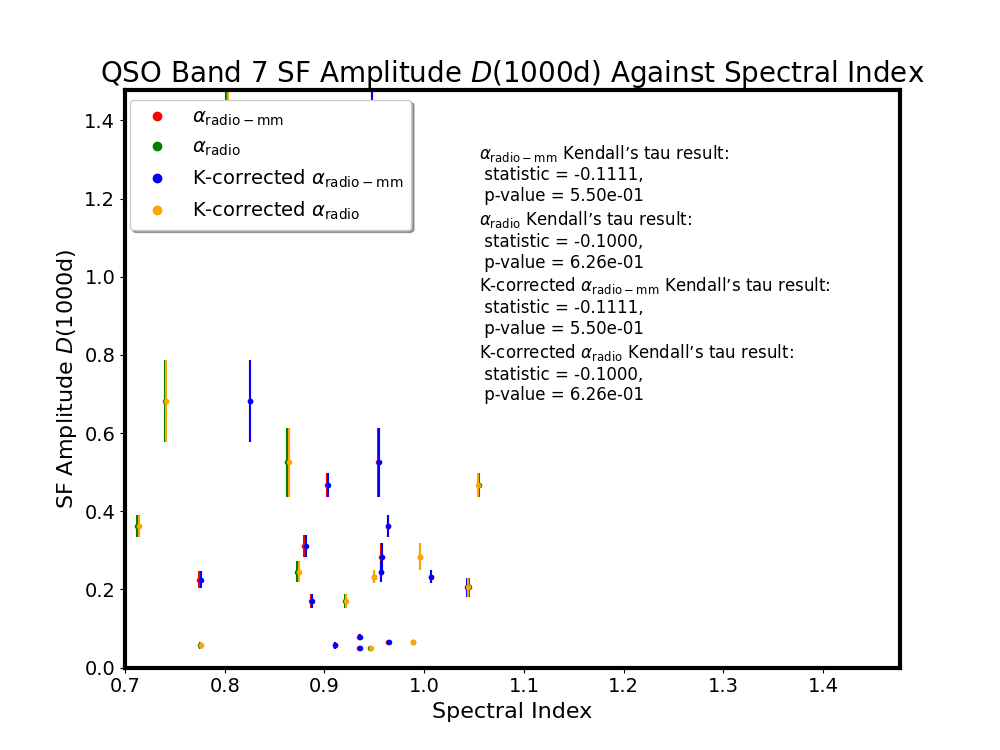

In [66]:
#######################################################################################################
### D(1000d) against Spectral index 
#######################################################################################################
BL_Lac = np.hstack([classclassify[1],classclassify[2], classclassify[4]])
QSO = classclassify[3]

BL_Lac_D1000 = [D1000_3[BL_Lac], D1000_6[BL_Lac], D1000_7[BL_Lac]]
BL_Lac_D1000_uperr = [D1000_uperr_3[BL_Lac], D1000_uperr_6[BL_Lac], D1000_uperr_7[BL_Lac]]
BL_Lac_D1000_lowerr = [D1000_lowerr_3[BL_Lac], D1000_lowerr_6[BL_Lac], D1000_lowerr_7[BL_Lac]]

QSO_D1000 = [D1000_3[QSO], D1000_6[QSO], D1000_7[QSO]]
QSO_D1000_uperr = [D1000_uperr_3[QSO], D1000_uperr_6[QSO], D1000_uperr_7[QSO]]
QSO_D1000_lowerr = [D1000_lowerr_3[QSO], D1000_lowerr_6[QSO], D1000_lowerr_7[QSO]]

D1000_array = [BL_Lac_D1000, QSO_D1000]
D1000_uperr_array = [BL_Lac_D1000_uperr, QSO_D1000_uperr]
D1000_lowerr_array = [BL_Lac_D1000_lowerr, QSO_D1000_lowerr]

BL_Lac_spectral_index = [alpha[BL_Lac], alphaRad[BL_Lac], alphaK[BL_Lac], alphaRadK[BL_Lac]]
QSO_spectral_index = [alpha[QSO], alphaRad[QSO], alphaK[QSO], alphaRadK[QSO]]

spectral_index_array = [BL_Lac_spectral_index, QSO_spectral_index]

Band_num = [3, 6, 7]
class_name = ['BL Lac', 'QSO']
label_name = ['band 3', 'band 6', 'band 7']
x_axis = [1.2, 1.1, 1.1]
y_axis = [1.1, 1.1, 1.4]

label_name = ['$\\alpha_\mathrm{radio-mm}$', '$\\alpha_\mathrm{radio}$', 'K-corrected $\\alpha_\mathrm{radio-mm}$', 'K-corrected $\\alpha_\mathrm{radio}$' ]

for m in range(0, 2):
    spectral_index = spectral_index_array[m]
    D1000 = D1000_array[m]
    D1000_uperr = D1000_uperr_array[m]
    D1000_lowerr = D1000_lowerr_array[m]
    
    for k in range(0, 3):
        up_err = [ D1000_uperr[k]-D1000[k] ]
        low_err = [ D1000[k]-D1000_lowerr[k] ]
        y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

        plt.rcParams['figure.figsize'] = [10, 7.5]
        plt.rcParams['axes.linewidth'] = 3    
        fig, ax = plt.subplots()

        for j in range(0, 4):
            aa = ~np.isnan(D1000[k]) & ~np.isnan(spectral_index[j])
            notnan = np.where(aa == True)[0]
    
            notnan_spec_index = spectral_index[j][notnan]
            notnan_D1000 = D1000[k][notnan]
    
            tau, p = stats.kendalltau(notnan_spec_index, notnan_D1000)
        
            min_x = np.nanmin([item for sublist in spectral_index_array[m] for item in sublist])
            max_x = np.nanmax([item for sublist in spectral_index_array[m] for item in sublist])
            min_y = np.nanmin([item for sublist in D1000_array[m] for item in sublist])
            max_y = np.nanmax([item for sublist in D1000_array[m] for item in sublist])
    
            ax.plot(notnan_spec_index, notnan_D1000, '.', c = color[j], markersize = 6, label = label_name[j])
            for i in range(0, len(notnan_spec_index)):
                ax.errorbar(notnan_spec_index[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = color[j])
            
            ax.text(max_x, max_y-0.17*j, label_name[j] + ' Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), 
                verticalalignment = 'top', fontsize = 12)
        
        ax.set_xlim(0.7, max_x*1.4)
        ax.set_ylim(0, max_y*1.1)
        plt.xlabel('Spectral Index',  fontsize = 16)
        plt.xticks(fontsize = 14)
        plt.ylabel('SF Amplitude $D(1000\mathrm{d})$',  fontsize = 16)
        plt.yticks(fontsize = 14)   
        fig.legend(loc='upper left', bbox_to_anchor = (0.12, 0.88), shadow=True, fontsize = 14, markerscale = 2) 
        plt.title(class_name[m]+' Band '+str(Band_num[k])+' SF Amplitude $D(1000\mathrm{d})$ Against Spectral Index', fontsize = 20)

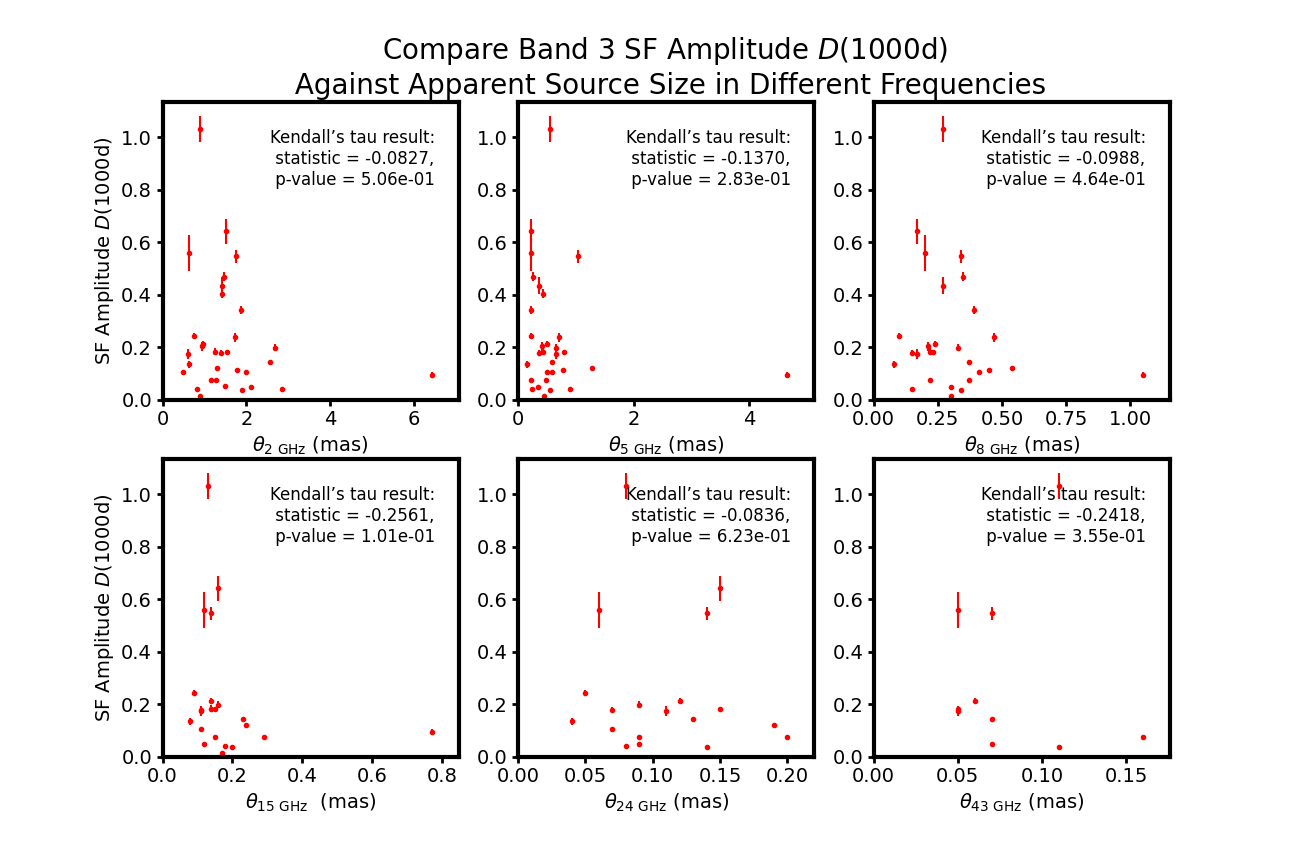

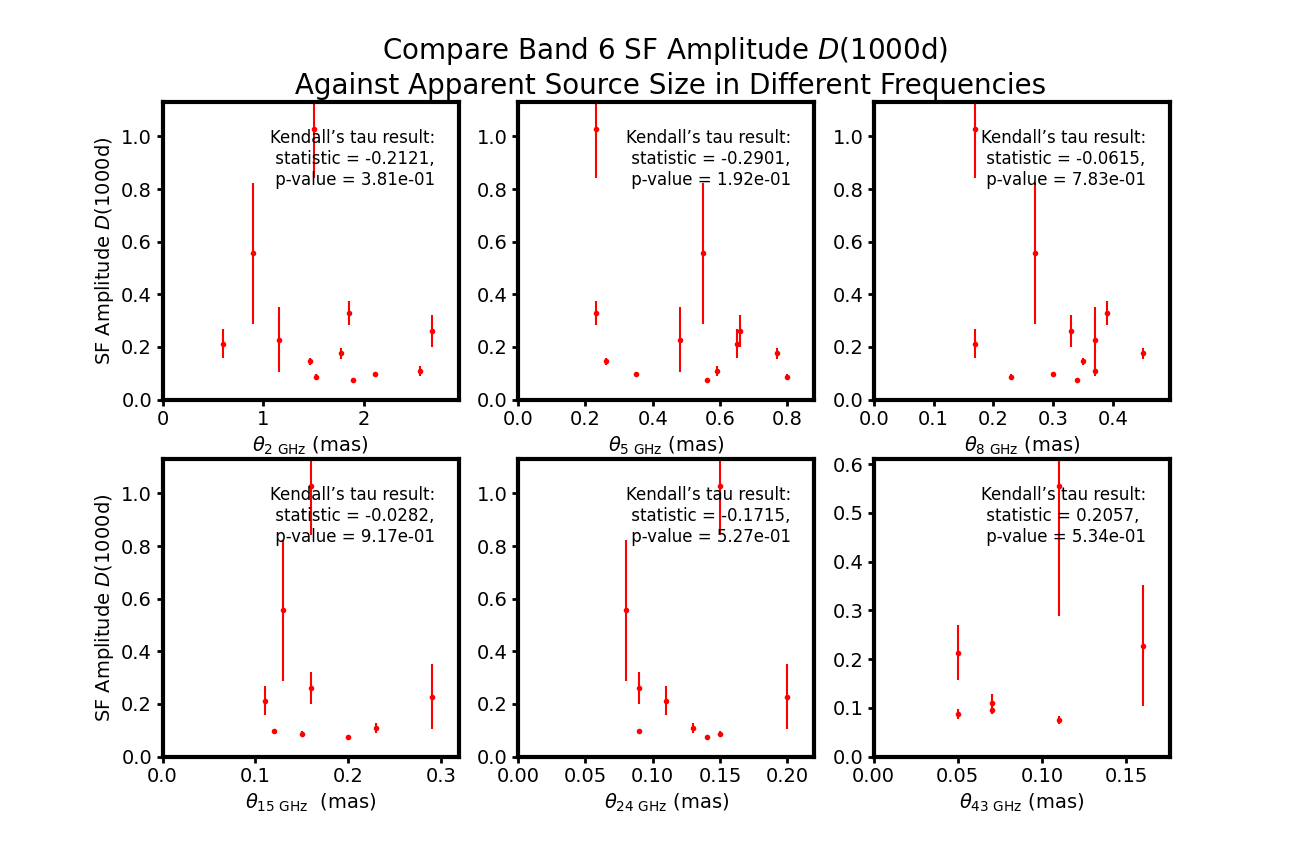

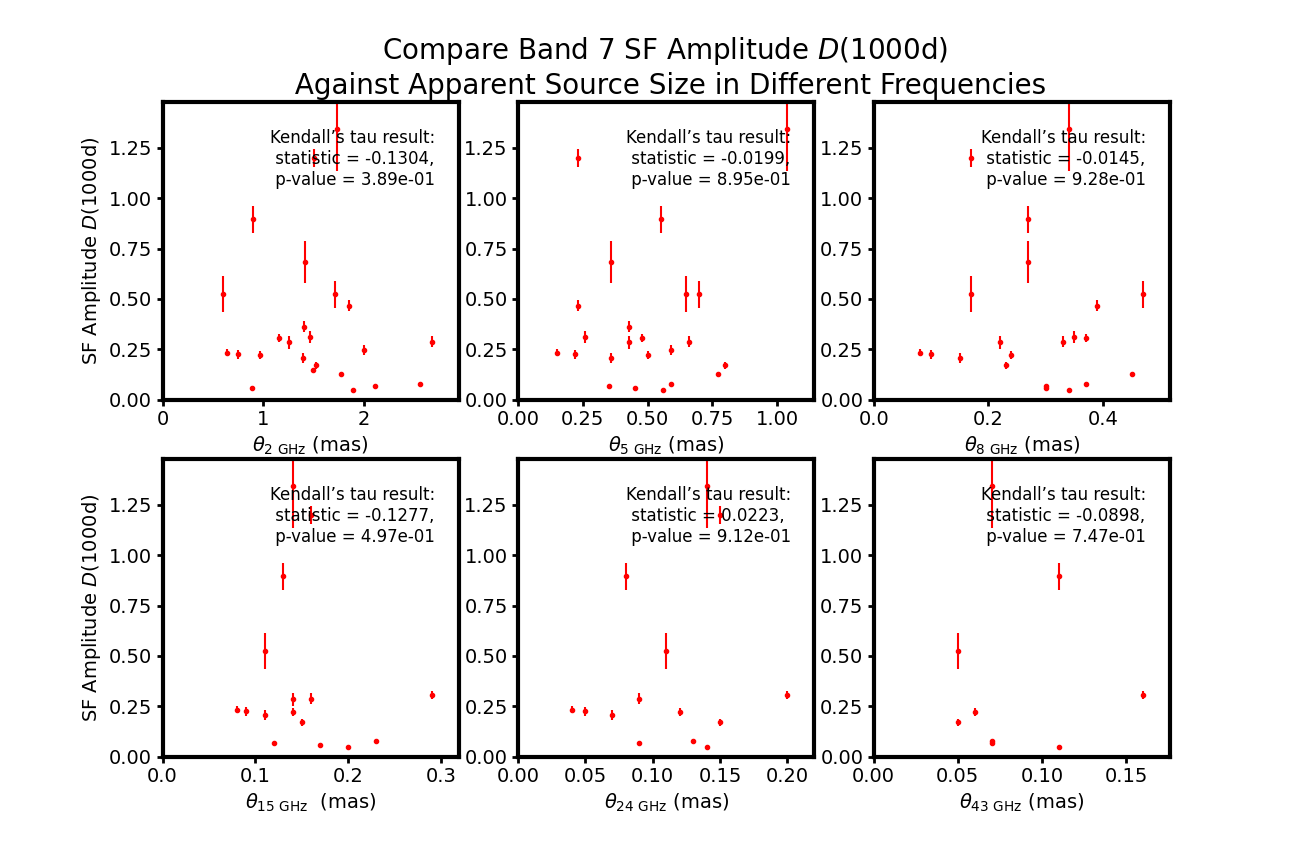

In [52]:
####### 2022/5/17 meeting:
### source size were measured in low frequencies (2, 5, 8, 15, 24, 43 GHz), 
### light curve was observed in high frequencies (ALMA band 3, 6 ,and 7)
### No significant correlation in each test
#######################################################################################################
### D(1000) vs apparent source size scattering plot
#######################################################################################################
D1000 = [D1000_3, D1000_6, D1000_7]
D1000_uperr = [D1000_uperr_3, D1000_uperr_6, D1000_uperr_7]
D1000_lowerr = [D1000_lowerr_3, D1000_lowerr_6, D1000_lowerr_7]

Band_num = [3, 6, 7]

for k in range(0, 3):
    
    up_err = [ D1000_uperr[k]-D1000[k] ]
    low_err = [ D1000[k]-D1000_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_2)
    notnan = np.where(aa == True)[0]
    
    size2 = size_2[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(size2, notnan_D1000)
    
    axs[0, 0].plot(size2, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size2)):
        axs[0, 0].errorbar(size2[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 0].set_xlim(0, np.nanmax(size2)*1.1)
    axs[0, 0].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[0, 0].set(xlabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')
    axs[0, 0].text(np.nanmax(size2)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)

    # 5 Ghz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_5)
    notnan = np.where(aa == True)[0]
    
    size5 = size_5[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(size5, notnan_D1000)
    
    axs[0, 1].plot(size5, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size5)):
        axs[0, 1].errorbar(size5[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 1].set_xlim(0, np.nanmax(size5)*1.1)
    axs[0, 1].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    #axs[1].legend(loc = 'upper left', bbox_to_anchor = (0.01, 0.98), shadow=True, fontsize = 12, markerscale = 2) 
    axs[0, 1].set(xlabel = '$\\theta_\mathrm{5\ GHz}$ (mas)')
    axs[0, 1].text(np.nanmax(size5)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 1].set_title('Compare Band %s SF Amplitude $D(1000\mathrm{d})$ \n Against Apparent Source Size in Different Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_8)
    notnan = np.where(aa == True)[0]
    
    size8 = size_8[notnan]
    notnan_D1000 = D1000[k][notnan]

    tau, p = stats.kendalltau(size8, notnan_D1000)
    
    axs[0, 2].plot(size8, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size8)):
        axs[0, 2].errorbar(size8[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 2].set_xlim(0, np.nanmax(size8)*1.1)
    axs[0, 2].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[0, 2].text(np.nanmax(size8)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 2].set(xlabel = '$\\theta_\mathrm{8\ GHz}$ (mas)')

    # 15 GHz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_15)
    notnan = np.where(aa == True)[0]
    
    size15 = size_15[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(size15, notnan_D1000)
    
    axs[1, 0].plot(size15, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size15)):
        axs[1, 0].errorbar(size15[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 0].set_xlim(0, np.nanmax(size15)*1.1)
    axs[1, 0].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 0].text(np.nanmax(size15)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 0].set(xlabel = '$\\theta_\mathrm{15\ GHz}\ $ (mas)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')

    # 24 Ghz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_24)
    notnan = np.where(aa == True)[0]
    
    size24 = size_24[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(size24, notnan_D1000)
    
    axs[1, 1].plot(size24, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size24)):
        axs[1, 1].errorbar(size24[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 1].set_xlim(0, np.nanmax(size24)*1.1)
    axs[1, 1].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 1].text(np.nanmax(size24)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 1].set(xlabel = '$\\theta_\mathrm{24\ GHz}$ (mas)')

    # 43 GHz 
    aa = ~np.isnan(D1000[k]) & ~np.isnan(size_43)
    notnan = np.where(aa == True)[0]
    
    size43 = size_43[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(size43, notnan_D1000)
    
    axs[1, 2].plot(size43, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(size43)):
        axs[1, 2].errorbar(size43[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 2].set_xlim(0, np.nanmax(size43)*1.1)
    axs[1, 2].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 2].text(np.nanmax(size43)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 2].set(xlabel = '$\\theta_\mathrm{43\ GHz}$ (mas)')


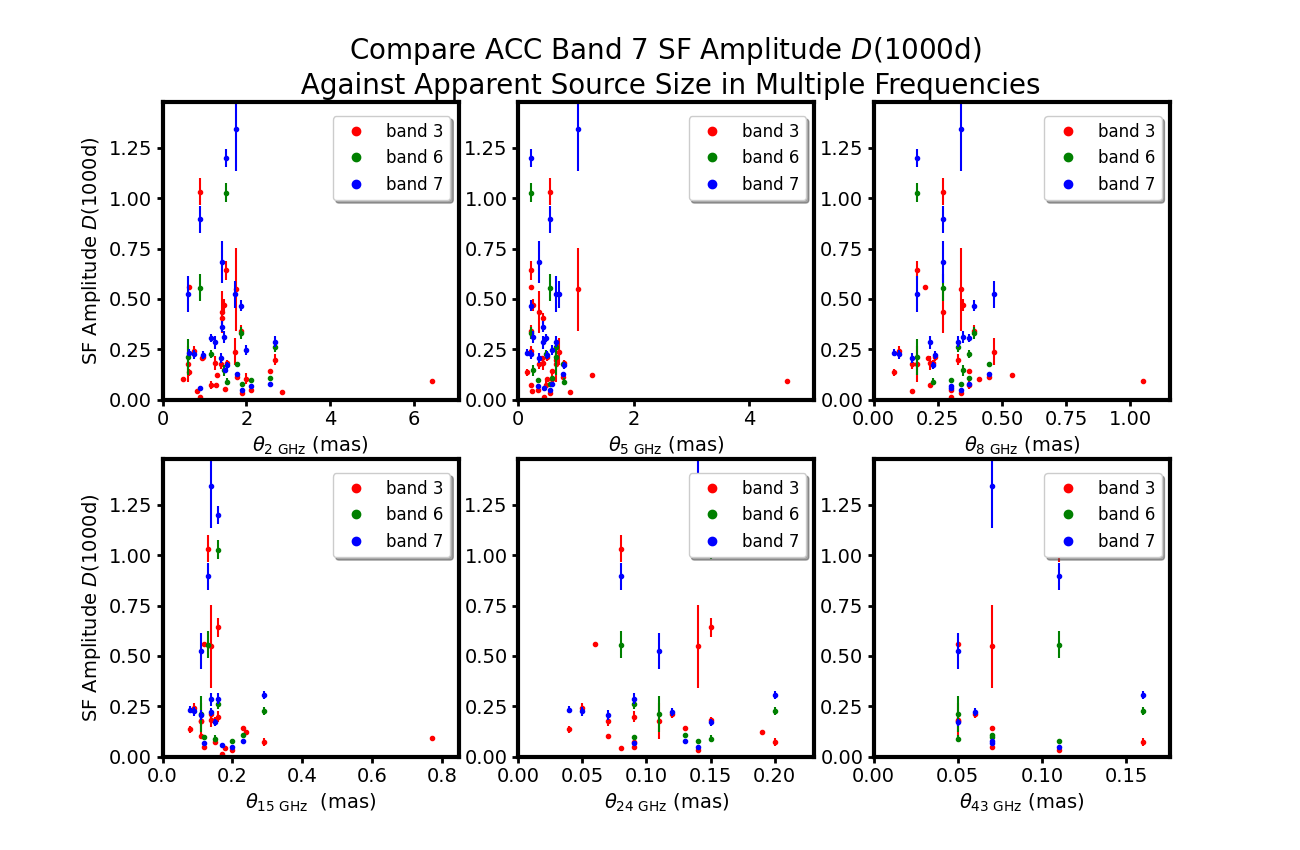

In [16]:
    up_err_3 = [ D1000_uperr_3-D1000_3 ]
    low_err_3 = [ D1000_3-D1000_lowerr_3 ]
    y_err_3 = np.array(list( zip( np.array(low_err_3) ,np.array(up_err_3) ) ) ).T
    
    up_err_6 = [ D1000_uperr_6-D1000_6 ]
    low_err_6 = [ D1000_6-D1000_lowerr_6 ]
    y_err_6 = np.array(list( zip( np.array(low_err_6) ,np.array(up_err_6) ) ) ).T
    
    up_err_7 = [ D1000_uperr_7-D1000_7 ]
    low_err_7 = [ D1000_7-D1000_lowerr_7 ]
    y_err_7 = np.array(list( zip( np.array(low_err_7) ,np.array(up_err_7) ) ) ).T

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    axs[0, 0].plot(size_2, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_2)):
        axs[0, 0].errorbar(size_2[i], D1000_3[i], yerr = y_err[i], ecolor = "red")

    axs[0, 0].plot(size_2, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_2)):
        axs[0, 0].errorbar(size_2[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[0, 0].plot(size_2, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_2)):
        axs[0, 0].errorbar(size_2[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[0, 0].set_xlim(0, np.nanmax(size_2)*1.1)
    axs[0, 0].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[0, 0].set(xlabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')

    # 5 Ghz
    axs[0, 1].plot(size_5, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_5)):
        axs[0, 1].errorbar(size_5[i], D1000_3[i], yerr = y_err[i], ecolor = "red")

    axs[0, 1].plot(size_5, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_5)):
        axs[0, 1].errorbar(size_5[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[0, 1].plot(size_5, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_5)):
        axs[0, 1].errorbar(size_5[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[0, 1].set_xlim(0, np.nanmax(size_5)*1.1)
    axs[0, 1].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[0, 1].set(xlabel = '$\\theta_\mathrm{5\ GHz}$ (mas)')
    axs[0, 1].set_title('Compare ACC SF Amplitude $D(1000\mathrm{d})$ \n Against Apparent Source Size in Multiple Frequencies', fontsize = 20)

    # 8 GHz 
    axs[0, 2].plot(size_8, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_8)):
        axs[0, 2].errorbar(size_8[i], D1000_3[i], yerr = y_err[i], ecolor = "red")

    axs[0, 2].plot(size_8, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_8)):
        axs[0, 2].errorbar(size_8[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[0, 2].plot(size_8, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_8)):
        axs[0, 2].errorbar(size_8[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[0, 2].set_xlim(0, np.nanmax(size_8)*1.1)
    axs[0, 2].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[0, 2].set(xlabel = '$\\theta_\mathrm{8\ GHz}$ (mas)')

    # 15 GHz
    axs[1, 0].plot(size_15, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_15)):
        axs[1, 0].errorbar(size_15[i], D1000_3[i], yerr = y_err[i], ecolor = "red")

    axs[1, 0].plot(size_15, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_15)):
        axs[1, 0].errorbar(size_15[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[1, 0].plot(size_15, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_15)):
        axs[1, 0].errorbar(size_15[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[1, 0].set_xlim(0, np.nanmax(size_15)*1.1)
    axs[1, 0].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[1, 0].set(xlabel = '$\\theta_\mathrm{15\ GHz}\ $ (mas)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')

    # 24 Ghz
    axs[1, 1].plot(size_24, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_24)):
        axs[1, 1].errorbar(size_24[i], D1000_3[i], yerr = y_err[i], ecolor = "red")
        
    axs[1, 1].plot(size_24, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_24)):
        axs[1, 1].errorbar(size_24[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[1, 1].plot(size_24, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_24)):
        axs[1, 1].errorbar(size_24[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[1, 1].set_xlim(0, np.nanmax(size_24)*1.1)
    axs[1, 1].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[1, 1].set(xlabel = '$\\theta_\mathrm{24\ GHz}$ (mas)')

    # 43 GHz 
    axs[1, 2].plot(size_43, D1000_3, '.', c = 'red', markersize = 6, label = 'band 3')
    for i in range(0, len(size_43)):
        axs[1, 2].errorbar(size_43[i], D1000_3[i], yerr = y_err[i], ecolor = "red")
        
    axs[1, 2].plot(size_43, D1000_6, '.', c = 'green', markersize = 6, label = 'band 6')
    for i in range(0, len(size_43)):
        axs[1, 2].errorbar(size_43[i], D1000_6[i], yerr = y_err[i], ecolor = "green")
        
    axs[1, 2].plot(size_43, D1000_7, '.', c = 'blue', markersize = 6, label = 'band 7')
    for i in range(0, len(size_43)):
        axs[1, 2].errorbar(size_43[i], D1000_7[i], yerr = y_err[i], ecolor = "blue")

    axs[1, 2].set_xlim(0, np.nanmax(size_43)*1.1)
    axs[1, 2].set_ylim(0, np.nanmax(D1000[k])*1.1)
    axs[1, 2].set(xlabel = '$\\theta_\mathrm{43\ GHz}$ (mas)')
    
    for i in range(0, 2):
        for k in range(0, 3):
            axs[i, k].legend(loc = 'upper right', bbox_to_anchor = (1.0, 0.98), shadow=True, fontsize = 12, markerscale = 2) 


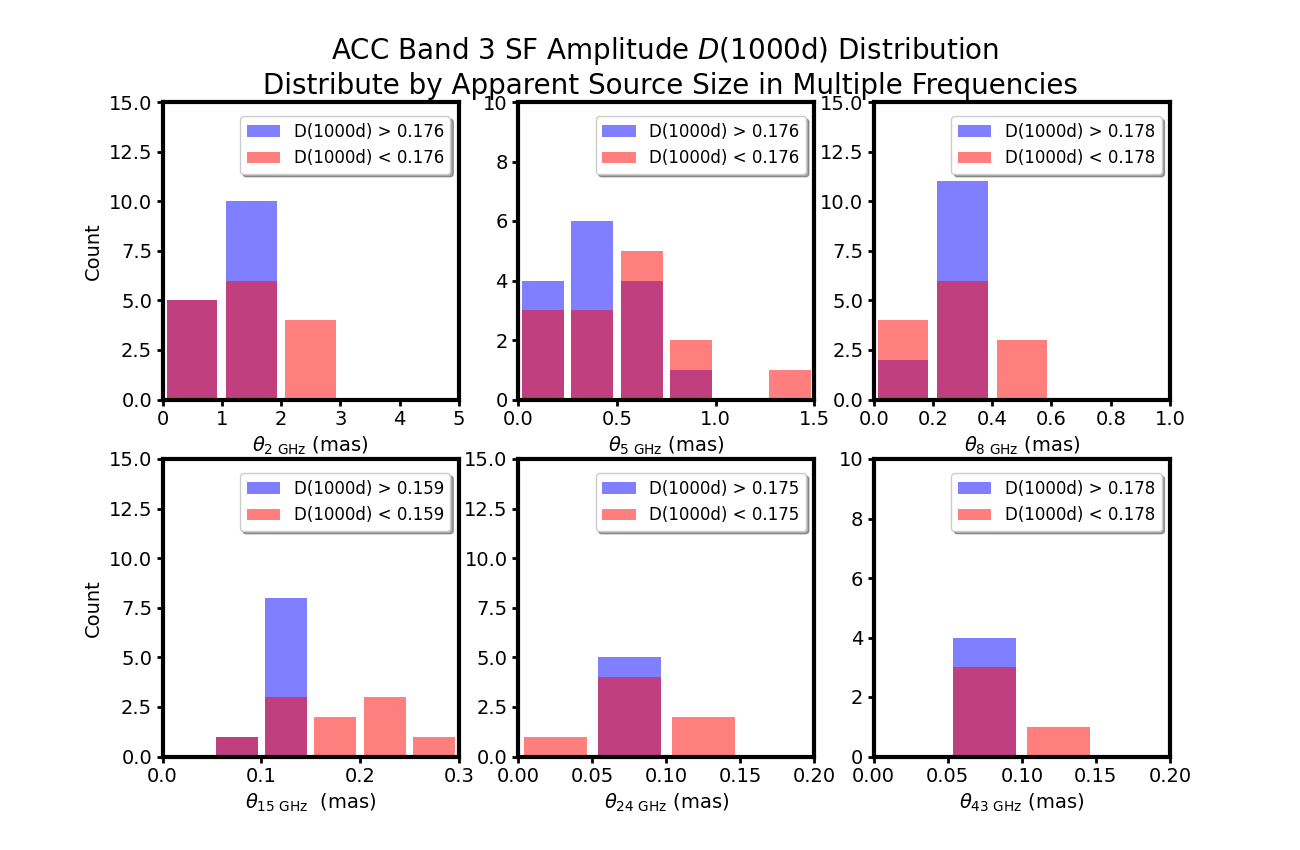

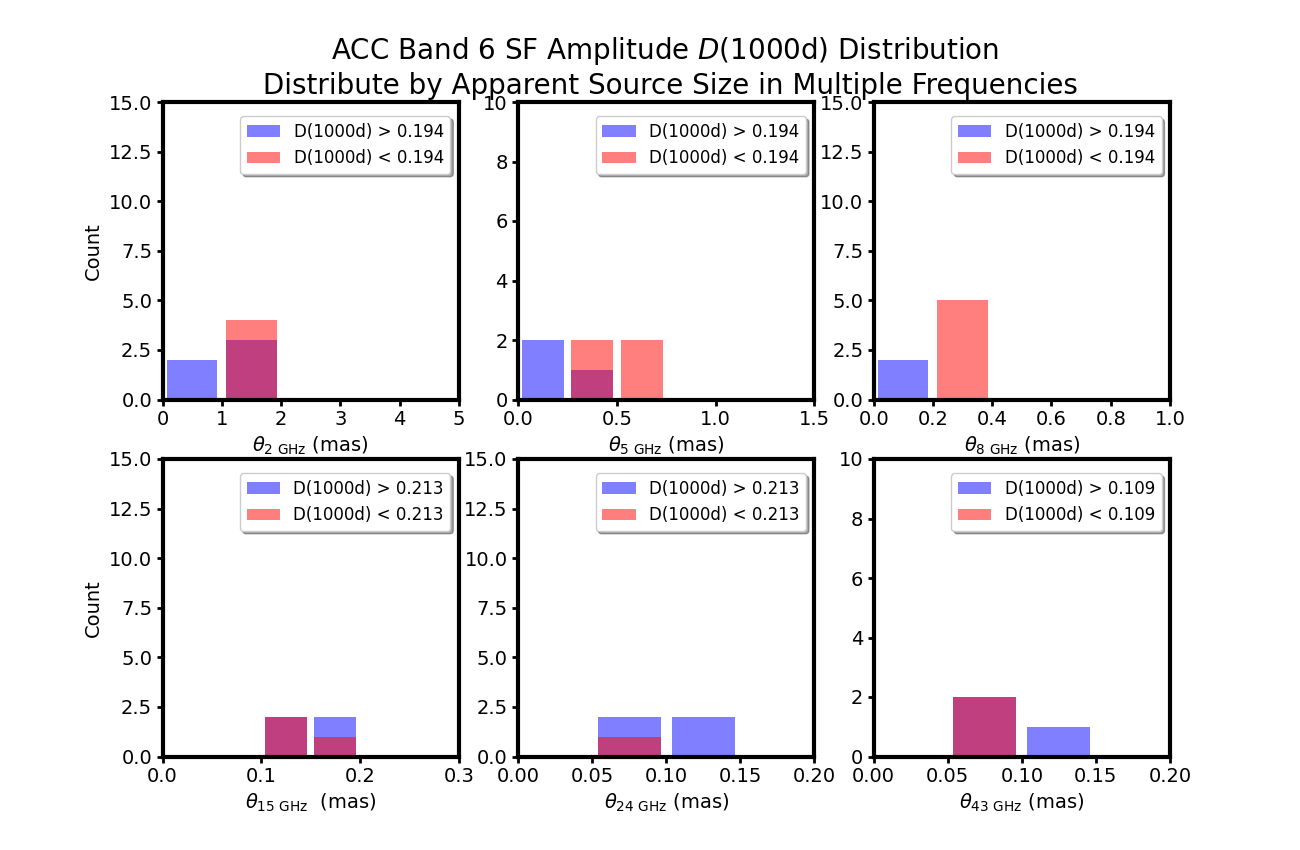

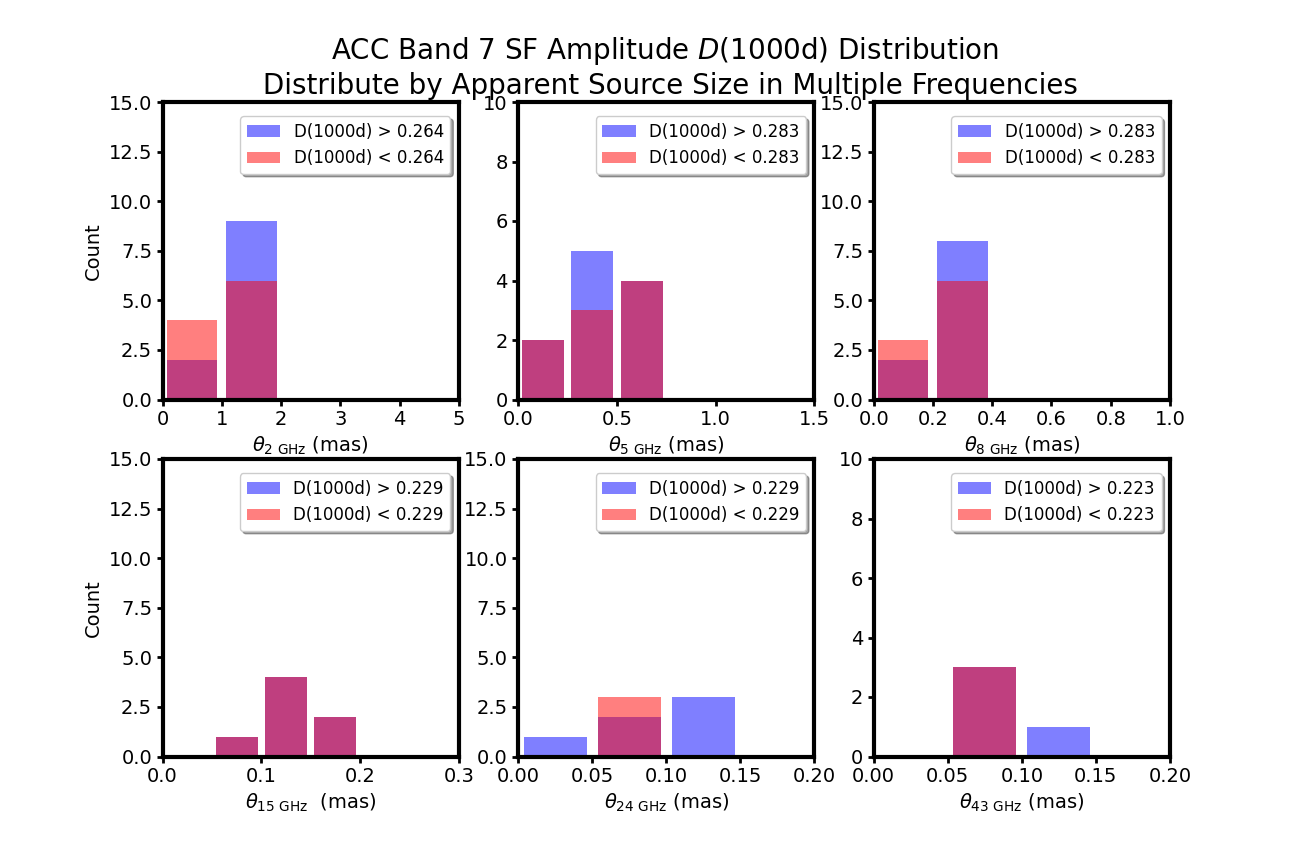

In [27]:
#######################################################################################################
### D(1000) vs apparent source size histogram 
#######################################################################################################
D1000 = [D1000_3, D1000_6, D1000_7]
Band_num = [3, 6, 7]

for i in range(0, 3):    
    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'
    
     # 2 GHz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_2)
    notnan = np.where(aa == True)[0]
    
    size2 = size_2[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
   
    n, bins, p = axs[0, 0].hist(size2[gt_median], bins = np.arange(0., np.nanmax(size2[gt_median]), 1), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[0, 0].hist(size2[lt_median], bins = np.arange(0., np.nanmax(size2[lt_median]), 1), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    axs[0, 0].set_xlim(0, 5)
    axs[0, 0].set_ylim(0, 15)
    axs[0, 0].set(xlabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', ylabel = 'Count')

    # 5 Ghz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_5)
    notnan = np.where(aa == True)[0]
    
    size5 = size_5[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[0, 1].hist(size5[gt_median], bins = np.arange(0., np.nanmax(size5[gt_median]), 0.25), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[0, 1].hist(size5[lt_median], bins = np.arange(0., np.nanmax(size5[lt_median]), 0.25), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[0, 1].set_xlim(0, 1.5)
    axs[0, 1].set_ylim(0, 10)
    axs[0, 1].set(xlabel = '$\\theta_\mathrm{5\ GHz}$ (mas)')
    axs[0, 1].set_title('ACC Band %s SF Amplitude $D(1000\mathrm{d})$ Distribution \n Distribute by Apparent Source Size in Multiple Frequencies' % str(Band_num[i]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_8)
    notnan = np.where(aa == True)[0]
    
    size8 = size_8[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[0, 2].hist(size8[gt_median], bins = np.arange(0., np.nanmax(size8[gt_median]), 0.2), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[0, 2].hist(size8[lt_median], bins = np.arange(0., np.nanmax(size8[lt_median]), 0.2), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[0, 2].set_xlim(0, 1)
    axs[0, 2].set_ylim(0, 15)
    axs[0, 2].set(xlabel = '$\\theta_\mathrm{8\ GHz}$ (mas)')

    # 15 GHz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_15)
    notnan = np.where(aa == True)[0]
    
    size15 = size_15[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 0].hist(size15[gt_median], bins = np.arange(0., np.nanmax(size15[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[1, 0].hist(size15[lt_median], bins = np.arange(0., np.nanmax(size15[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 0].set_xlim(0, 0.3)
    axs[1, 0].set_ylim(0, 15)
    axs[1, 0].set(xlabel = '$\\theta_\mathrm{15\ GHz}\ $ (mas)', ylabel = 'Count')

    # 24 Ghz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_24)
    notnan = np.where(aa == True)[0]
    
    size24 = size_24[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 1].hist(size24[gt_median], bins = np.arange(0., np.nanmax(size24[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[1, 1].hist(size24[lt_median], bins = np.arange(0., np.nanmax(size24[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 1].set_xlim(0, 0.2)
    axs[1, 1].set_ylim(0, 15)
    axs[1, 1].set(xlabel = '$\\theta_\mathrm{24\ GHz}$ (mas)')

    # 43 GHz 
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_43)
    notnan = np.where(aa == True)[0]
    
    size43 = size_43[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 2].hist(size43[gt_median], bins = np.arange(0., np.nanmax(size43[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    #for item in p:
    #    item.set_height(item.get_height()/sum(n)) 
    
    n, bins, p = axs[1, 2].hist(size43[lt_median], bins = np.arange(0., np.nanmax(size43[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 2].set_xlim(0, 0.2)
    axs[1, 2].set_ylim(0, 10)
    axs[1, 2].set(xlabel = '$\\theta_\mathrm{43\ GHz}$ (mas)')
    
    for i in range(0, 2):
        for k in range(0, 3):
            axs[i, k].legend(loc = 'upper right', bbox_to_anchor = (1.0, 0.98), shadow=True, fontsize = 12, markerscale = 2) 



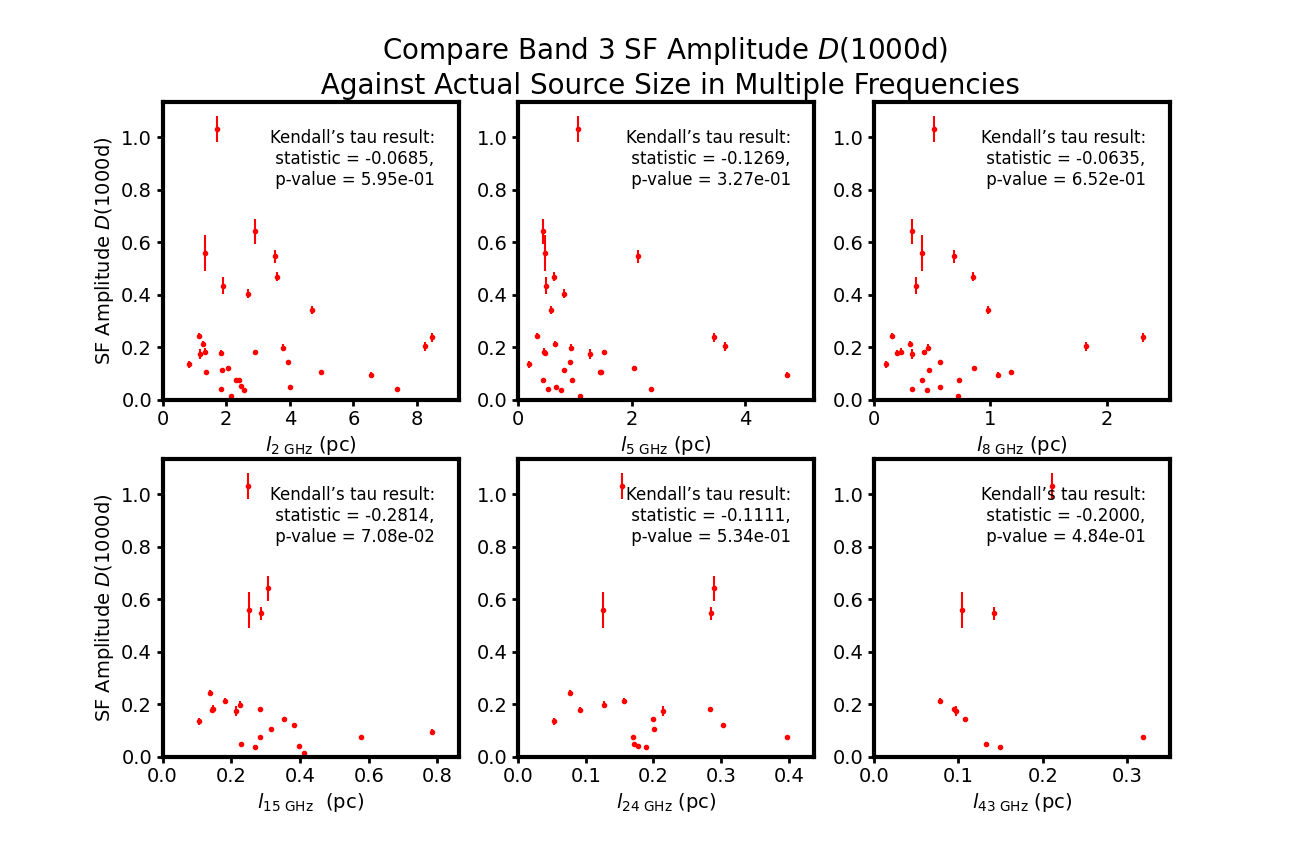

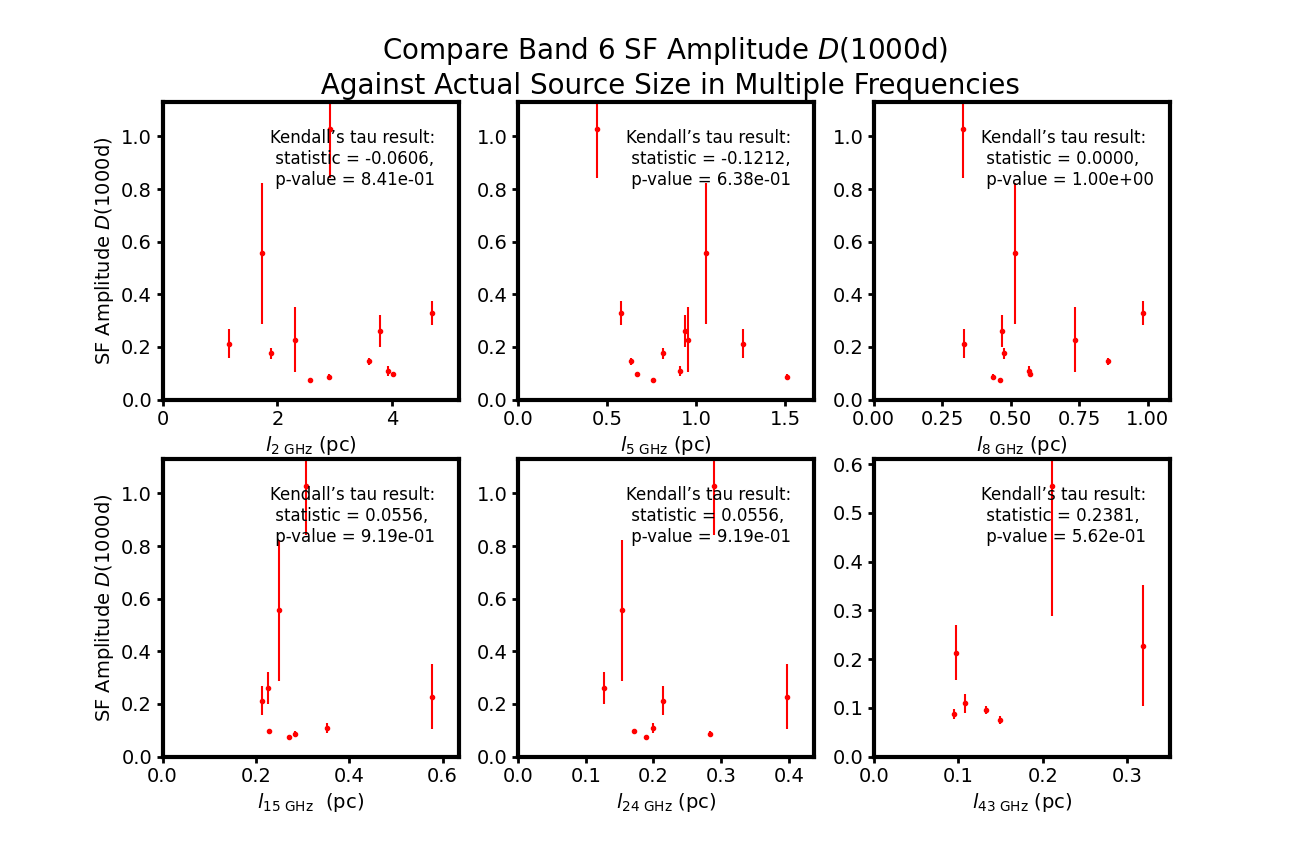

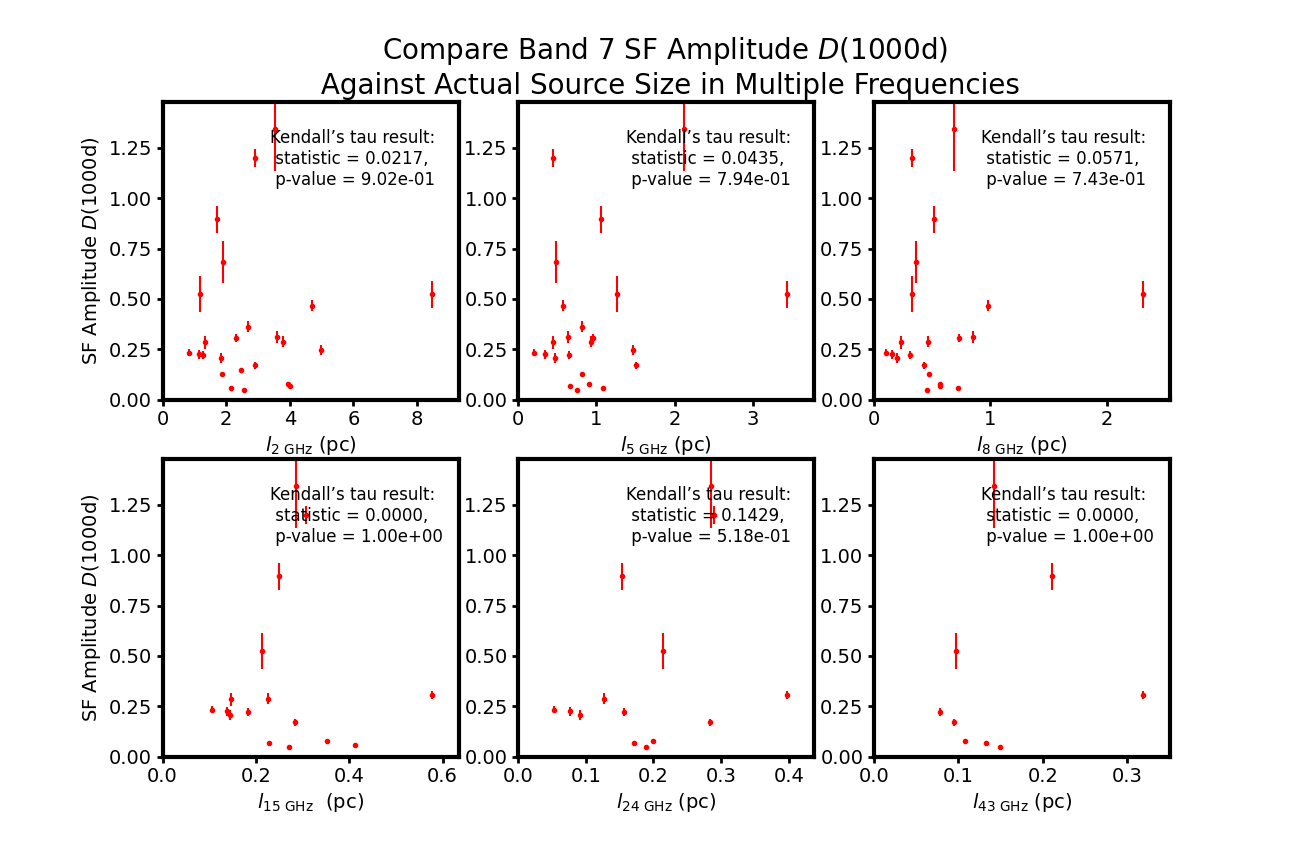

In [19]:
#######################################################################################################
### D(1000) vs actual source size scattering plot
#######################################################################################################

D1000 = [D1000_3, D1000_6, D1000_7]
D1000_uperr = [D1000_uperr_3, D1000_uperr_6, D1000_uperr_7]
D1000_lowerr = [D1000_lowerr_3, D1000_lowerr_6, D1000_lowerr_7]
Band_num = [3, 6, 7]

for k in range(0, 3):
    
    up_err = [ D1000_uperr[k]-D1000[k] ]
    low_err = [ D1000[k]-D1000_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_2)
    notnan = np.where(aa == True)[0]
    
    act_size2 = act_size_2[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size2, notnan_D1000)
    
    axs[0, 0].plot(act_size2, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size2)):
        axs[0, 0].errorbar(act_size2[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 0].set_xlim(0, np.nanmax(act_size2)*1.1)
    axs[0, 0].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[0, 0].text(np.nanmax(act_size2)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 0].set(xlabel = '$l_\mathrm{2\ GHz}$ (pc)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')

    # 5 Ghz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_5)
    notnan = np.where(aa == True)[0]
    
    act_size5 = act_size_5[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size5, notnan_D1000)
    
    axs[0, 1].plot(act_size5, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size5)):
        axs[0, 1].errorbar(act_size5[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 1].set_xlim(0, np.nanmax(act_size5)*1.1)
    axs[0, 1].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[0, 1].text(np.nanmax(act_size5)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 1].set(xlabel = '$l_\mathrm{5\ GHz}$ (pc)')
    axs[0, 1].set_title('Compare Band %s SF Amplitude $D(1000\mathrm{d})$ \n Against Actual Source Size in Multiple Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_8)
    notnan = np.where(aa == True)[0]
    
    act_size8 = act_size_8[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size8, notnan_D1000)
    
    axs[0, 2].plot(act_size8, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size8)):
        axs[0, 2].errorbar(act_size8[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 2].set_xlim(0, np.nanmax(act_size8)*1.1)
    axs[0, 2].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[0, 2].text(np.nanmax(act_size8)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 2].set(xlabel = '$l_\mathrm{8\ GHz}$ (pc)')

    # 15 GHz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_15)
    notnan = np.where(aa == True)[0]
    
    act_size15= act_size_15[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size15, notnan_D1000)
    
    axs[1, 0].plot(act_size15, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size15)):
        axs[1, 0].errorbar(act_size15[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 0].set_xlim(0, np.nanmax(act_size15)*1.1)
    axs[1, 0].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 0].text(np.nanmax(act_size15)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 0].set(xlabel = '$l_\mathrm{15\ GHz}\ $ (pc)', ylabel = 'SF Amplitude $D(1000\mathrm{d})$')

    # 24 Ghz
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_24)
    notnan = np.where(aa == True)[0]
    
    act_size24 = act_size_24[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size24, notnan_D1000)
    
    axs[1, 1].plot(act_size24, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size24)):
        axs[1, 1].errorbar(act_size24[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 1].set_xlim(0, np.nanmax(act_size24)*1.1)
    axs[1, 1].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 1].text(np.nanmax(act_size24)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 1].set(xlabel = '$l_\mathrm{24\ GHz}$ (pc)')

    # 43 GHz 
    aa = ~np.isnan(D1000[k]) & ~np.isnan(act_size_43)
    notnan = np.where(aa == True)[0]
    
    act_size43 = act_size_43[notnan]
    notnan_D1000 = D1000[k][notnan]
    
    tau, p = stats.kendalltau(act_size43, notnan_D1000)
    
    axs[1, 2].plot(act_size43, notnan_D1000, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size43)):
        axs[1, 2].errorbar(act_size43[i], notnan_D1000[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 2].set_xlim(0, np.nanmax(act_size43)*1.1)
    axs[1, 2].set_ylim(0, np.nanmax(notnan_D1000)*1.1)
    axs[1, 2].text(np.nanmax(act_size43)*0.4, np.nanmax(notnan_D1000), 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 2].set(xlabel = '$l_\mathrm{43\ GHz}$ (pc)')


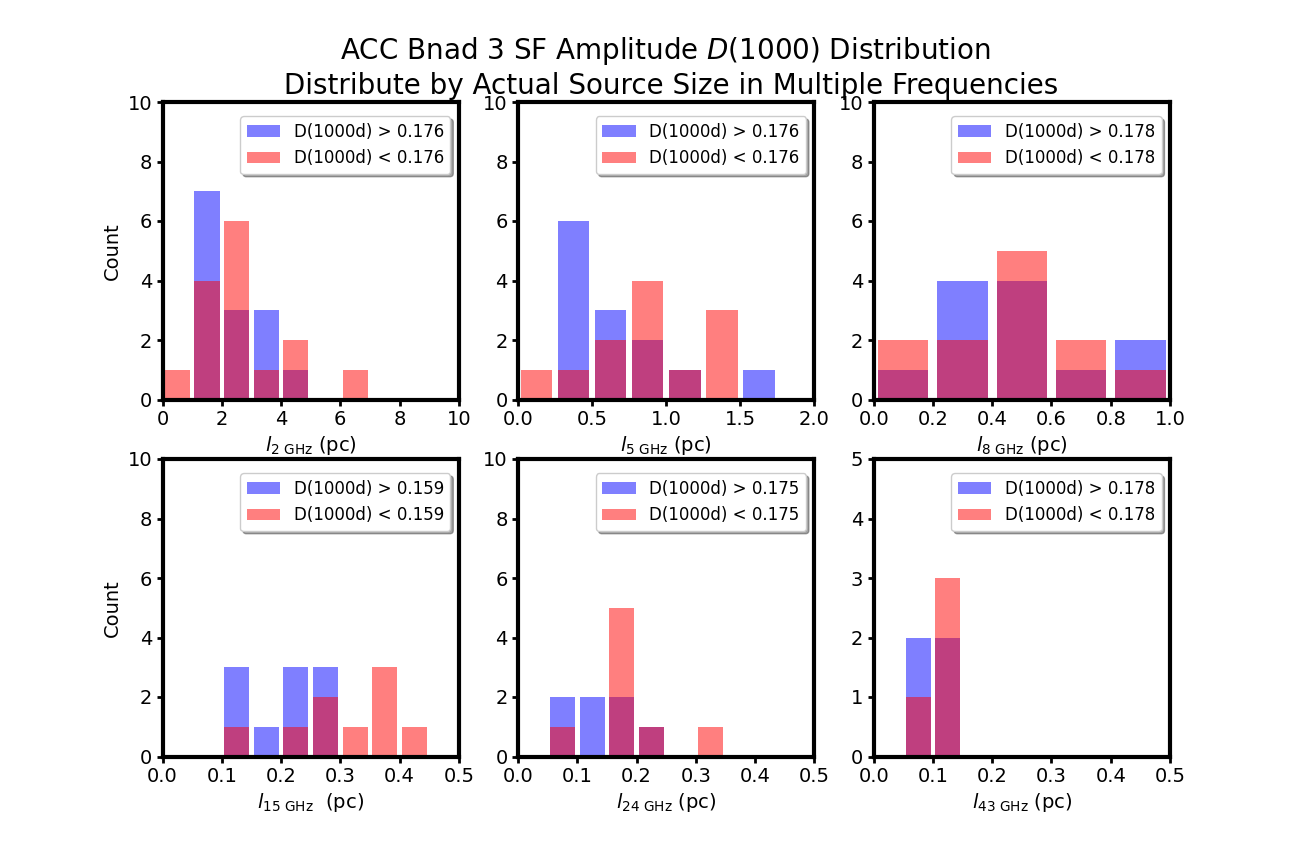

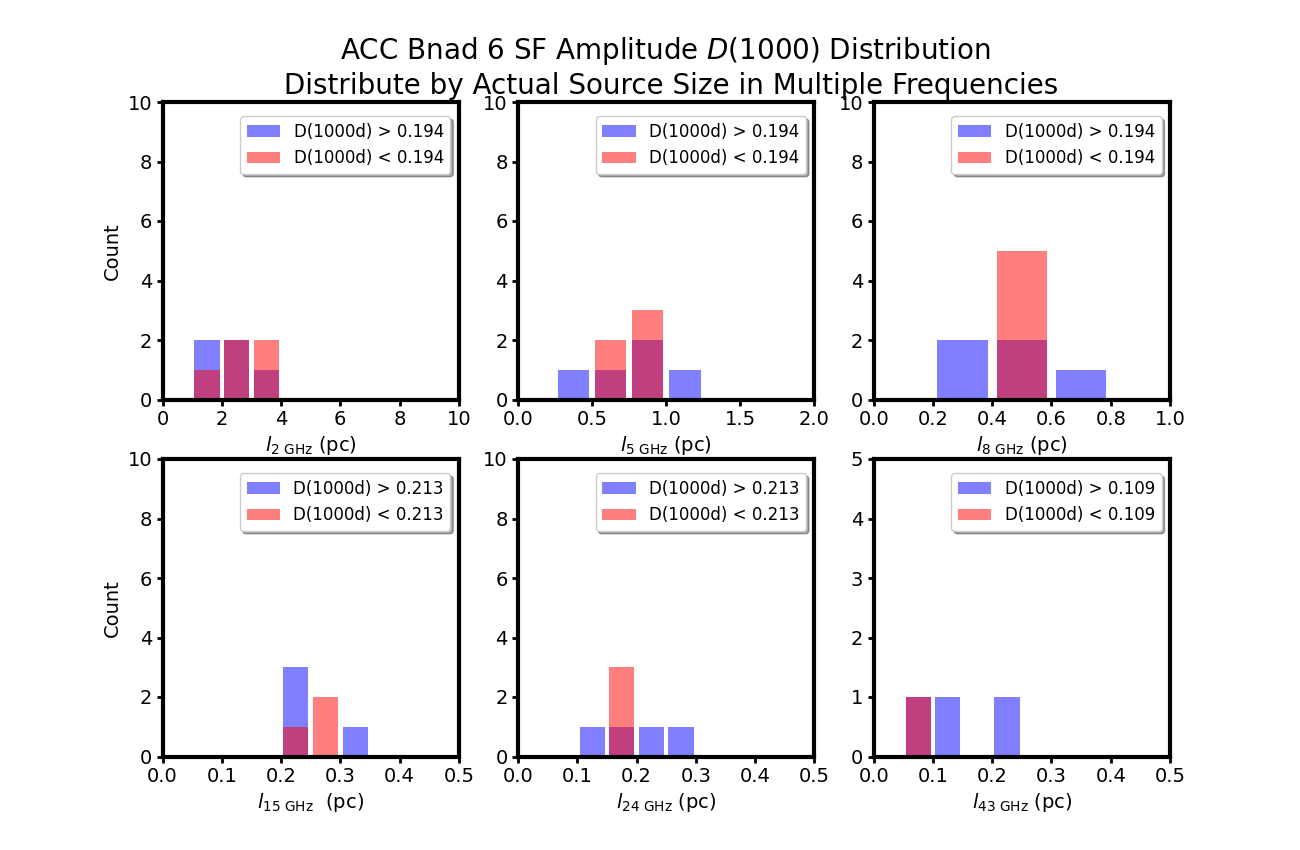

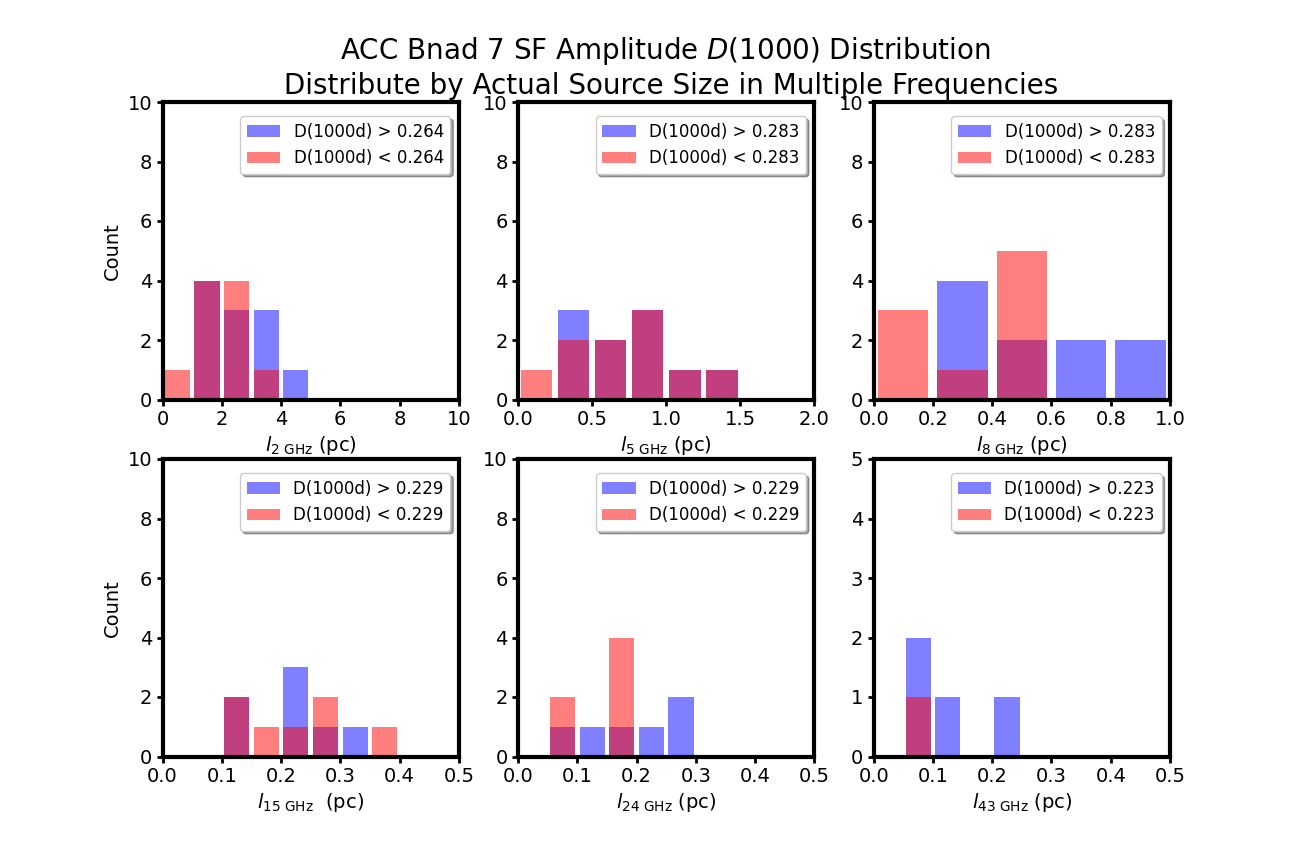

In [28]:
#######################################################################################################
### D(1000) vs actual source size histogram 
#######################################################################################################

D1000 = [D1000_3, D1000_6, D1000_7]
Band_num = [3, 6, 7]

for i in range(0, 3):    
    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'
    
     # 2 GHz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(act_size_2)
    notnan = np.where(aa == True)[0]
    
    act_size2 = act_size_2[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
   
    n, bins, p = axs[0, 0].hist(act_size2[gt_median], bins = np.arange(0., np.nanmax(act_size2[gt_median]), 1), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[0, 0].hist(act_size2[lt_median], bins = np.arange(0., np.nanmax(act_size2[lt_median]), 1), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    axs[0, 0].set_xlim(0, 10)
    axs[0, 0].set_ylim(0, 10)
    axs[0, 0].set(xlabel = '$l_\mathrm{2\ GHz}$ (pc)', ylabel = 'Count')

    # 5 Ghz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(act_size_5)
    notnan = np.where(aa == True)[0]
    
    act_size5 = act_size_5[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[0, 1].hist(act_size5[gt_median], bins = np.arange(0., np.nanmax(act_size5[gt_median]), 0.25), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[0, 1].hist(act_size5[lt_median], bins = np.arange(0., np.nanmax(act_size5[lt_median]), 0.25), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[0, 1].set_xlim(0, 2)
    axs[0, 1].set_ylim(0, 10)
    axs[0, 1].set(xlabel = '$l_\mathrm{5\ GHz}$ (pc)')
    axs[0, 1].set_title('ACC Bnad %s SF Amplitude $D(1000)$ Distribution \n Distribute by Actual Source Size in Multiple Frequencies' % str(Band_num[i]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(D1000[i]) & ~np.isnan(size_8)
    notnan = np.where(aa == True)[0]
    
    act_size8 = act_size_8[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[0, 2].hist(act_size8[gt_median], bins = np.arange(0., np.nanmax(act_size8[gt_median]), 0.2), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[0, 2].hist(act_size8[lt_median], bins = np.arange(0., np.nanmax(act_size8[lt_median]), 0.2), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[0, 2].set_xlim(0, 1)
    axs[0, 2].set_ylim(0, 10)
    axs[0, 2].set(xlabel = '$l_\mathrm{8\ GHz}$ (pc)')

    # 15 GHz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(act_size_15)
    notnan = np.where(aa == True)[0]
    
    act_size15 = act_size_15[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 0].hist(act_size15[gt_median], bins = np.arange(0., np.nanmax(act_size15[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[1, 0].hist(act_size15[lt_median], bins = np.arange(0., np.nanmax(act_size15[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 0].set_xlim(0, 0.5)
    axs[1, 0].set_ylim(0, 10)
    axs[1, 0].set(xlabel = '$l_\mathrm{15\ GHz}\ $ (pc)', ylabel = 'Count')

    # 24 Ghz
    aa = ~np.isnan(D1000[i]) & ~np.isnan(act_size_24)
    notnan = np.where(aa == True)[0]
    
    act_size24 = act_size_24[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 1].hist(act_size24[gt_median], bins = np.arange(0., np.nanmax(act_size24[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[1, 1].hist(act_size24[lt_median], bins = np.arange(0., np.nanmax(act_size24[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 1].set_xlim(0, 0.5)
    axs[1, 1].set_ylim(0, 10)
    axs[1, 1].set(xlabel = '$l_\mathrm{24\ GHz}$ (pc)')

    # 43 GHz 
    aa = ~np.isnan(D1000[i]) & ~np.isnan(act_size_43)
    notnan = np.where(aa == True)[0]
    
    act_size43 = act_size_43[notnan]
    
    gt_median = np.where( (D1000[i][notnan] > np.nanmedian(D1000[i][notnan])) | (D1000[i][notnan] == np.nanmedian(D1000[i][notnan])))[0]
    lt_median = np.where( D1000[i][notnan] < np.nanmedian(D1000[i][notnan]))[0]
    
    n, bins, p = axs[1, 2].hist(act_size43[gt_median], bins = np.arange(0., np.nanmax(act_size43[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = 'D(1000d) > %5.3f' % np.nanmedian(D1000[i][notnan]) )
    
    n, bins, p = axs[1, 2].hist(act_size43[lt_median], bins = np.arange(0., np.nanmax(act_size43[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = 'D(1000d) < %5.3f' % np.nanmedian(D1000[i][notnan]) )

    axs[1, 2].set_xlim(0, 0.5)
    axs[1, 2].set_ylim(0, 5)
    axs[1, 2].set(xlabel = '$l_\mathrm{43\ GHz}$ (pc)')
    
    for i in range(0, 2):
        for k in range(0, 3):
            axs[i, k].legend(loc = 'upper right', bbox_to_anchor = (1.0, 0.98), shadow=True, fontsize = 12, markerscale = 2) 



/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/1640449881.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0, 0].set_ylim(0, np.nanmax(tauchar[k])*10)
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/1640449881.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  notnan_tauchar = tauchar[k][[notnan]]
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/1640449881.py:61: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0, 1].set_ylim(0, np.nanmax(tauchar[k])*10)
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/1640449881.py:81: UserWarning: Attempted to set non-positi

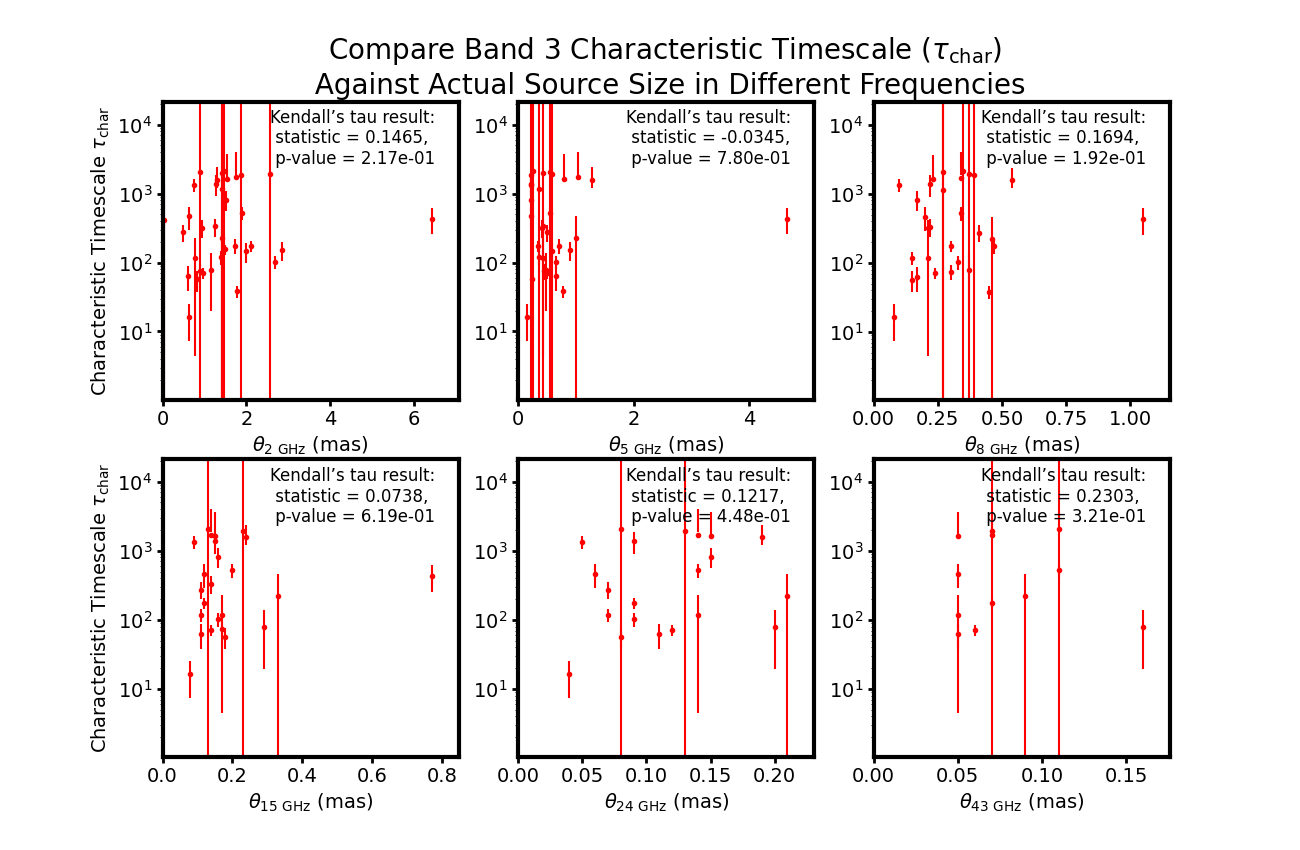

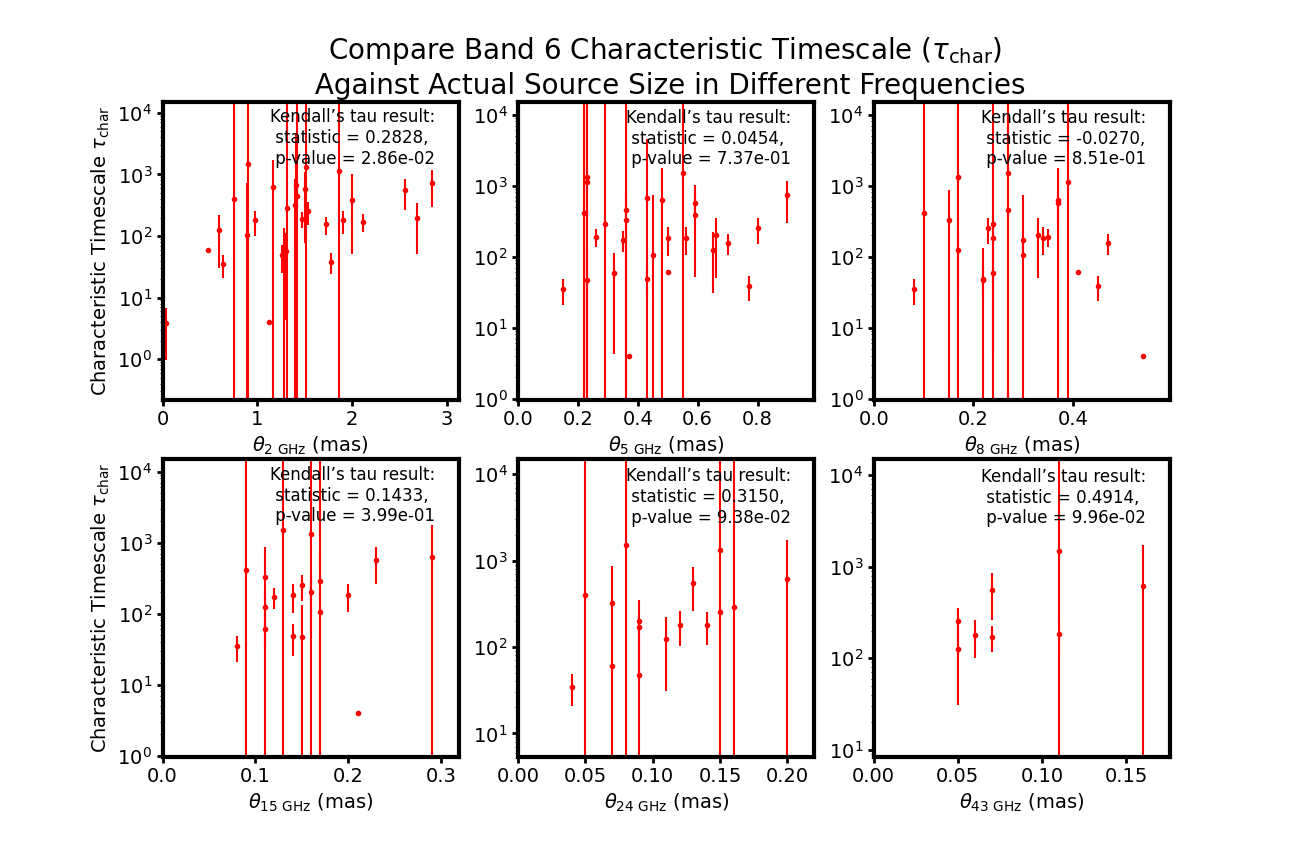

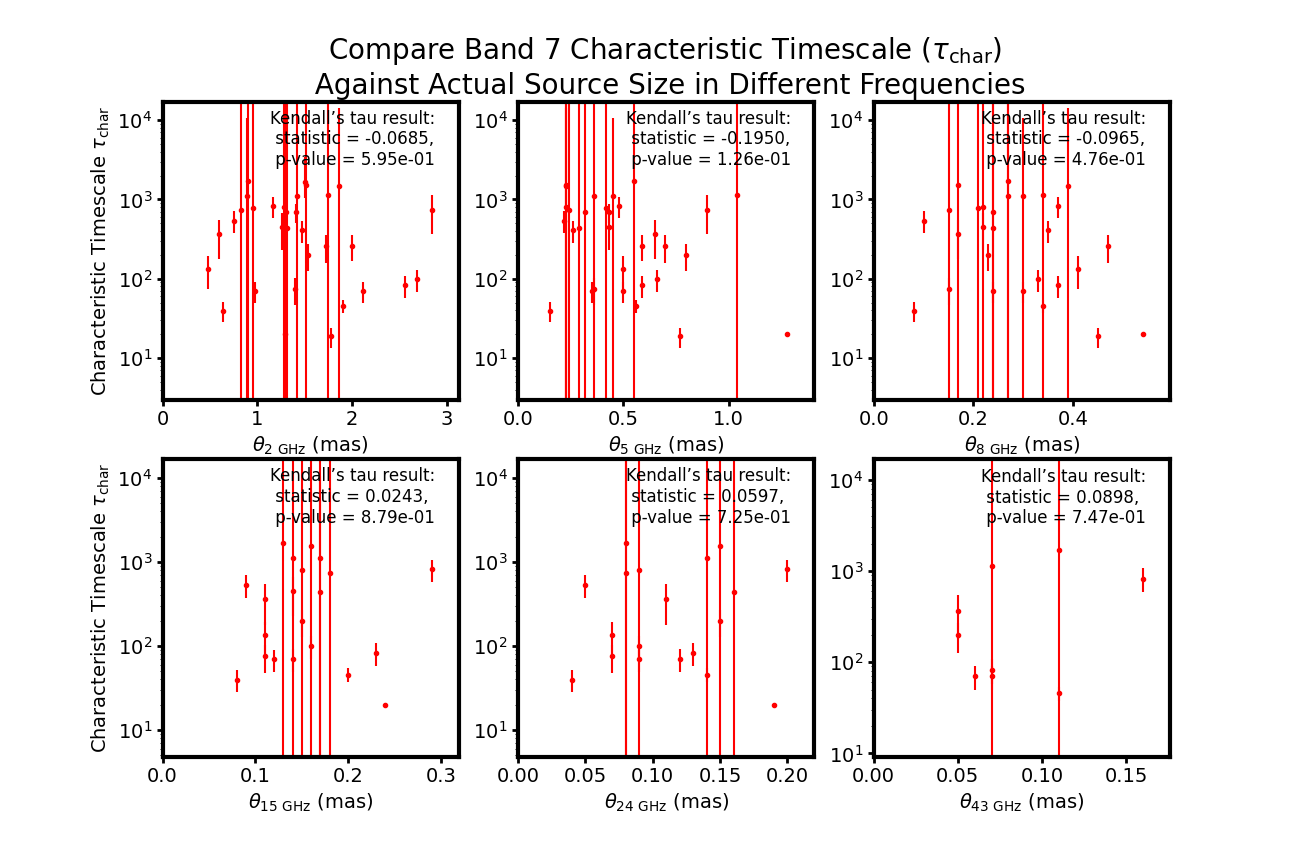

In [10]:
#######################################################################################################
### tau_char vs apparent source size scattering plot
#######################################################################################################

tauchar = [tauchar_3, tauchar_6, tauchar_7]
tauchar_uperr = [tauchar_uperr_3, tauchar_uperr_6, tauchar_uperr_7]
tauchar_lowerr = [tauchar_lowerr_3, tauchar_lowerr_6, tauchar_lowerr_7]
Band_num = [3, 6, 7]

for k in range(0, 3):
    
    up_err = [ tauchar_uperr[k]-tauchar[k] ]
    low_err = [ tauchar[k]-tauchar_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_2)
    notnan = np.where(aa == True)[0]
    
    size2 = size_2[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    tau, p = stats.kendalltau(size2, notnan_tauchar)
    
    axs[0, 0].plot(size2, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size2)):
        axs[0, 0].errorbar(size2[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xlim(0, np.nanmax(size2)*1.1)
    axs[0, 0].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[0, 0].text(np.nanmax(size2)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 0].set(xlabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', ylabel = 'Characteristic Timescale $\\tau_\mathrm{char}$')

    # 5 Ghz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_5)
    notnan = np.where(aa == True)[0]
    
    size5 = size_5[notnan]
    notnan_tauchar = tauchar[k][[notnan]]
    
    tau, p = stats.kendalltau(size5, notnan_tauchar)
    
    axs[0, 1].plot(size5, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size5)):
        axs[0, 1].errorbar(size5[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xlim(0, np.nanmax(size5)*1.1)
    axs[0, 1].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[0, 1].text(np.nanmax(size5)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 1].set(xlabel = '$\\theta_\mathrm{5\ GHz}$ (mas)')
    axs[0, 1].set_title('Compare Band %s Characteristic Timescale ($\\tau_\mathrm{char}$) \n Against Actual Source Size in Different Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_8)
    notnan = np.where(aa == True)[0]
    
    size8 = size_8[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    tau, p = stats.kendalltau(size8, notnan_tauchar)
    
    axs[0, 2].plot(size8, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size8)):
        axs[0, 2].errorbar(size8[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[0, 2].set_yscale('log')
    axs[0, 2].set_xlim(0, np.nanmax(size8)*1.1)
    axs[0, 2].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[0, 2].text(np.nanmax(size8)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 2].set(xlabel = '$\\theta_\mathrm{8\ GHz}$ (mas)')

    # 15 GHz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_15)
    notnan = np.where(aa == True)[0]
    
    size15 = size_15[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    tau, p = stats.kendalltau(size15, notnan_tauchar)
    
    axs[1, 0].plot(size15, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size15)):
        axs[1, 0].errorbar(size15[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[1, 0].set_yscale('log')
    axs[1, 0].set_xlim(0, np.nanmax(size15)*1.1)
    axs[1, 0].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[1, 0].text(np.nanmax(size15)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 0].set(xlabel = '$\\theta_\mathrm{15\ GHz}$ (mas)', ylabel = 'Characteristic Timescale $\\tau_\mathrm{char}$')

    # 24 Ghz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_24)
    notnan = np.where(aa == True)[0]
    
    size24 = size_24[notnan]
    notnan_tauchar = tauchar[k][notnan]

    tau, p = stats.kendalltau(size24, notnan_tauchar)
    
    axs[1, 1].plot(size24, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size24)):
        axs[1, 1].errorbar(size24[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[1, 1].set_yscale('log')
    axs[1, 1].set_xlim(0, np.nanmax(size24)*1.1)
    axs[1, 1].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[1, 1].text(np.nanmax(size24)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 1].set(xlabel = '$\\theta_\mathrm{24\ GHz}$ (mas)')

    # 43 GHz 
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_43)
    notnan = np.where(aa == True)[0]
    
    size43 = size_43[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    tau, p = stats.kendalltau(size43, notnan_tauchar)

    axs[1, 2].plot(size43, notnan_tauchar, '.', c = 'red', markersize = 6)
    for i in range(0, len(size43)):
        axs[1, 2].errorbar(size43[i], notnan_tauchar[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[1, 2].set_yscale('log')
    axs[1, 2].set_xlim(0, np.nanmax(size43)*1.1)
    axs[1, 2].set_ylim(0, np.nanmax(tauchar[k])*10)
    axs[1, 2].text(np.nanmax(size43)*0.4, np.nanmax(notnan_tauchar)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 2].set(xlabel = '$\\theta_\mathrm{43\ GHz}$ (mas)')



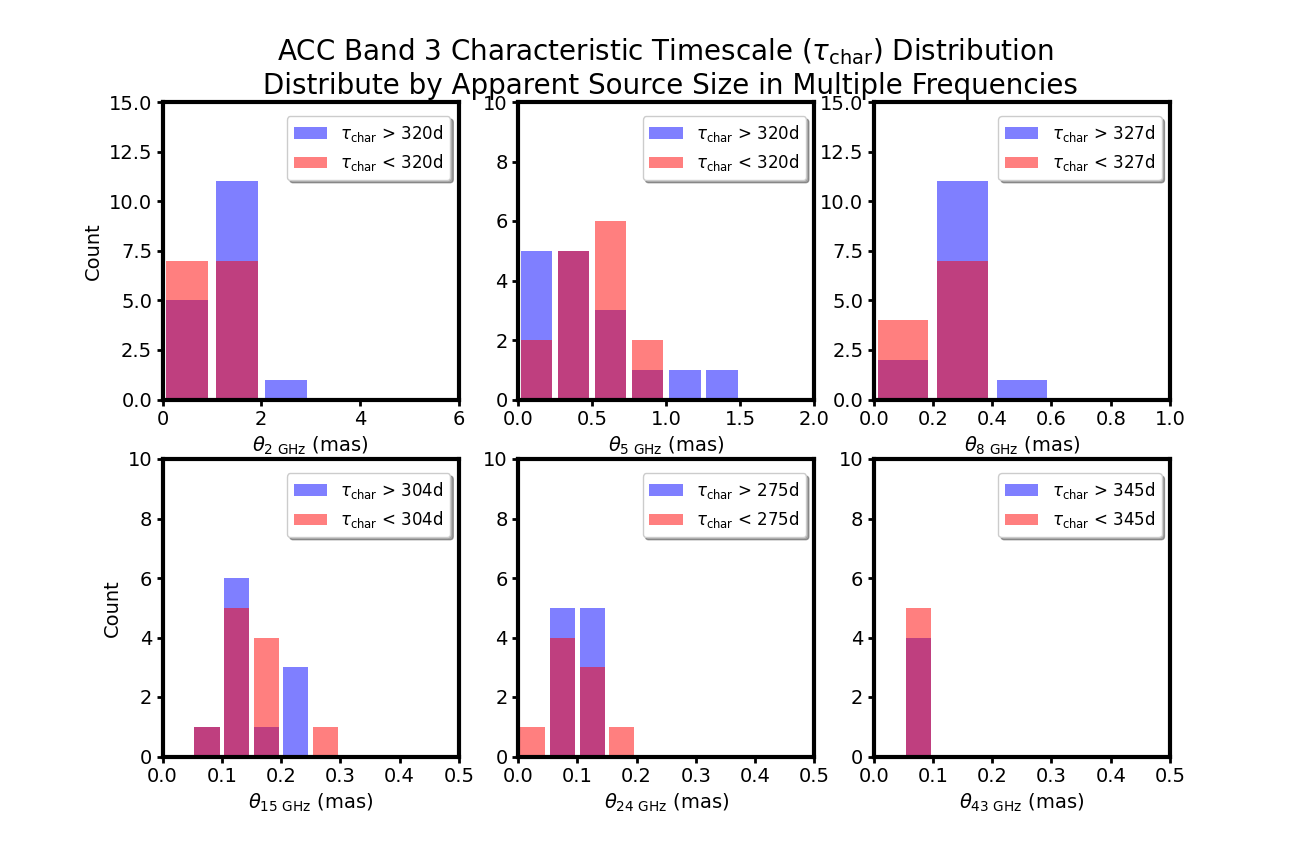

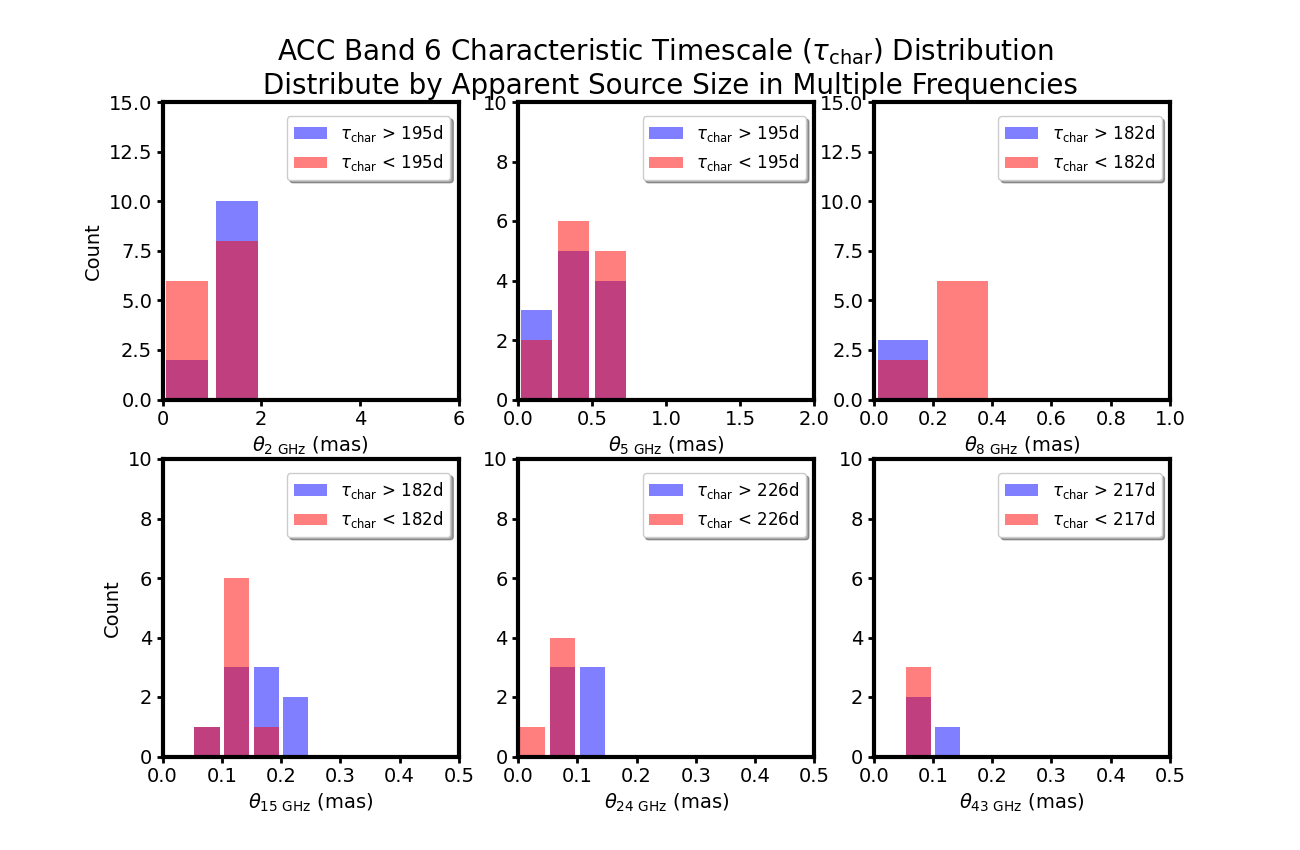

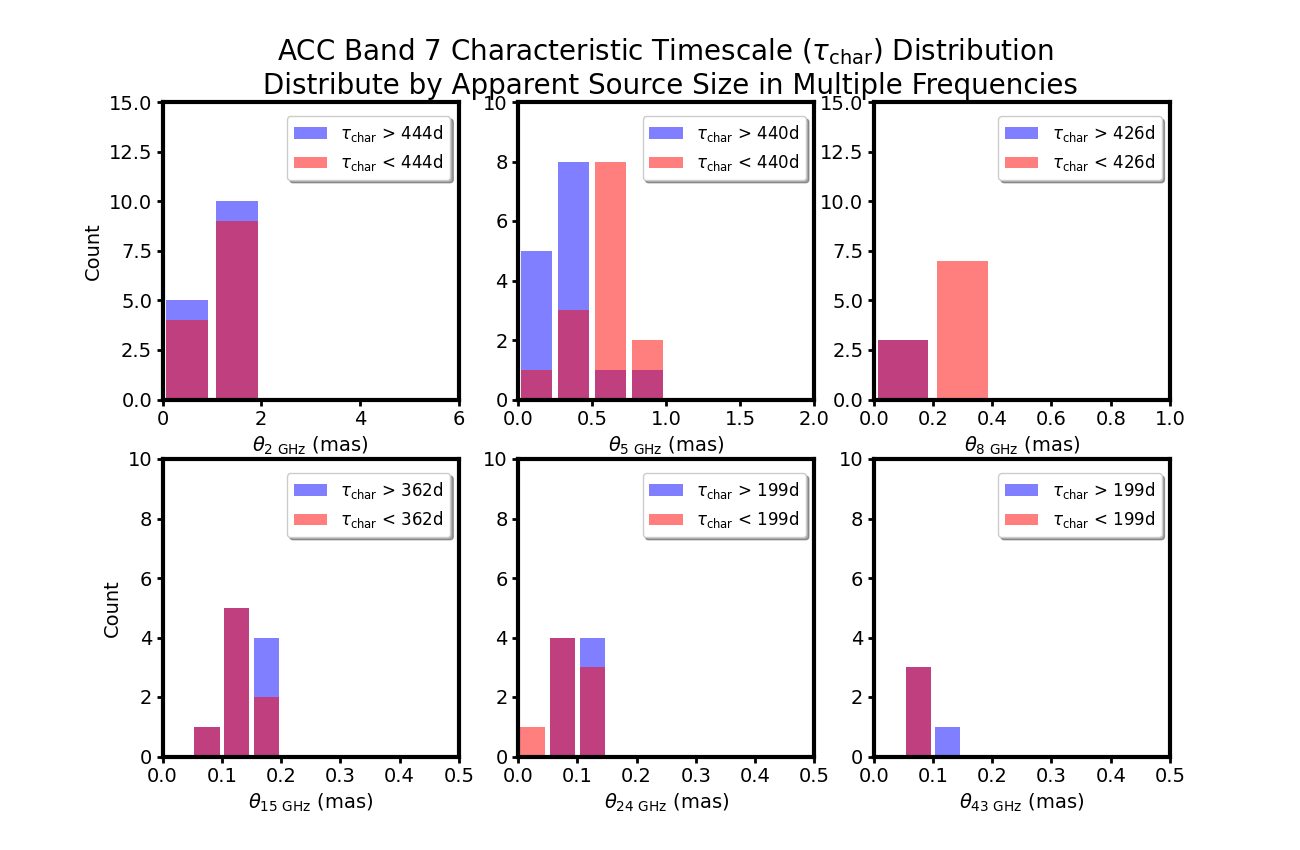

In [29]:
#######################################################################################################
### tau_char vs apparent source size histogram 
#######################################################################################################

tauchar = [tauchar_3, tauchar_6, tauchar_7]
Band_num = [3, 6, 7]

for k in range(0, 3):

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_2)
    notnan = np.where(aa == True)[0]
    
    size2 = size_2[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
   
    n, bins, p = axs[0, 0].hist(size2[gt_median], bins = np.arange(0., np.nanmax(size2[gt_median]), 1), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[0, 0].hist(size2[lt_median], bins = np.arange(0., np.nanmax(size2[lt_median]), 1), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    axs[0, 0].set_xlim(0, 6)
    axs[0, 0].set_ylim(0, 15)
    axs[0, 0].set(xlabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', ylabel = 'Count')

    # 5 Ghz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_5)
    notnan = np.where(aa == True)[0]
    
    size5 = size_5[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
    
    n, bins, p = axs[0, 1].hist(size5[gt_median], bins = np.arange(0., np.nanmax(size5[gt_median]), 0.25), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[0, 1].hist(size5[lt_median], bins = np.arange(0., np.nanmax(size5[lt_median]), 0.25), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )

    axs[0, 1].set_xlim(0, 2)
    axs[0, 1].set_ylim(0, 10)
    axs[0, 1].set(xlabel = '$\\theta_\mathrm{5\ GHz}$ (mas)')
    axs[0, 1].set_title('ACC Band %s Characteristic Timescale ($\\tau_\mathrm{char}$) Distribution \n Distribute by Apparent Source Size in Multiple Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_8)
    notnan = np.where(aa == True)[0]
    
    size8 = size_8[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
    
    n, bins, p = axs[0, 2].hist(size8[gt_median], bins = np.arange(0., np.nanmax(size8[gt_median]), 0.2), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[0, 2].hist(size8[lt_median], bins = np.arange(0., np.nanmax(size8[lt_median]), 0.2), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )

    axs[0, 2].set_xlim(0, 1)
    axs[0, 2].set_ylim(0, 15)
    axs[0, 2].set(xlabel = '$\\theta_\mathrm{8\ GHz}$ (mas)')

    # 15 GHz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_15)
    notnan = np.where(aa == True)[0]
    
    size15 = size_15[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
    
    n, bins, p = axs[1, 0].hist(size15[gt_median], bins = np.arange(0., np.nanmax(size15[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[1, 0].hist(size15[lt_median], bins = np.arange(0., np.nanmax(size15[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )

    axs[1, 0].set_xlim(0, 0.5)
    axs[1, 0].set_ylim(0, 10)
    axs[1, 0].set(xlabel = '$\\theta_\mathrm{15\ GHz}$ (mas)', ylabel = 'Count')

    # 24 Ghz
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_24)
    notnan = np.where(aa == True)[0]
    
    size24 = size_24[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
    
    n, bins, p = axs[1, 1].hist(size24[gt_median], bins = np.arange(0., np.nanmax(size24[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[1, 1].hist(size24[lt_median], bins = np.arange(0., np.nanmax(size24[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )

    axs[1, 1].set_xlim(0, 0.5)
    axs[1, 1].set_ylim(0, 10)
    axs[1, 1].set(xlabel = '$\\theta_\mathrm{24\ GHz}$ (mas)')

    # 43 GHz 
    aa = ~np.isnan(tauchar[k]) & ~np.isnan(size_43)
    notnan = np.where(aa == True)[0]
    
    size43 = size_43[notnan]
    notnan_tauchar = tauchar[k][notnan]
    
    gt_median = np.where( (tauchar[k][notnan] > np.nanmedian(tauchar[k][notnan])) | (tauchar[k][notnan] == np.nanmedian(tauchar[k][notnan])))[0]
    lt_median = np.where( tauchar[k][notnan] < np.nanmedian(tauchar[k][notnan]))[0]
    
    n, bins, p = axs[1, 2].hist(size43[gt_median], bins = np.arange(0., np.nanmax(size43[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ > %3.0fd' % np.nanmedian(tauchar[k][notnan]) )
    
    n, bins, p = axs[1, 2].hist(size43[lt_median], bins = np.arange(0., np.nanmax(size43[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$\\tau_\mathrm{char}$ < %3.0fd' % np.nanmedian(tauchar[k][notnan]) )

    axs[1, 2].set_xlim(0, 0.5)
    axs[1, 2].set_ylim(0, 10)
    axs[1, 2].set(xlabel = '$\\theta_\mathrm{43\ GHz}$ (mas)')
    
    for i in range(0, 2):
        for k in range(0, 3):
            axs[i, k].legend(loc = 'upper right', bbox_to_anchor = (1.0, 0.98), shadow=True, fontsize = 12, markerscale = 2) 


/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/2267644060.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 3) # , sharey='row'
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/2267644060.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0, 0].set_ylim(0, np.nanmax(notnan_tausrc)*10)
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/2267644060.py:61: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0, 1].set_ylim(0, np.nanmax(notnan_tausrc)*10)
/var/folders/94/t26sjbcn6556mfzt3vm0j5dm0000gn/T/ipykernel_29031/2267644060.py:81: UserWarning: Attempted to se

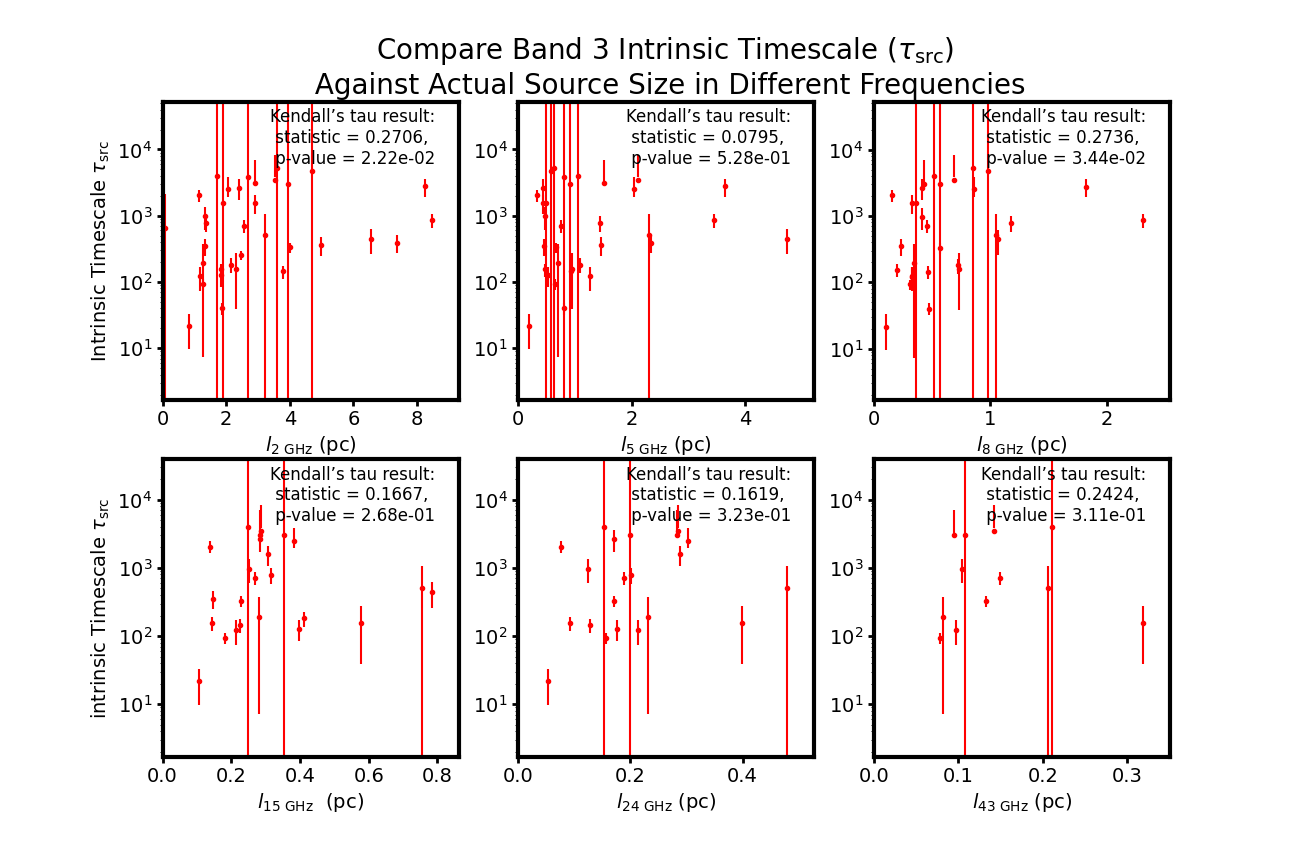

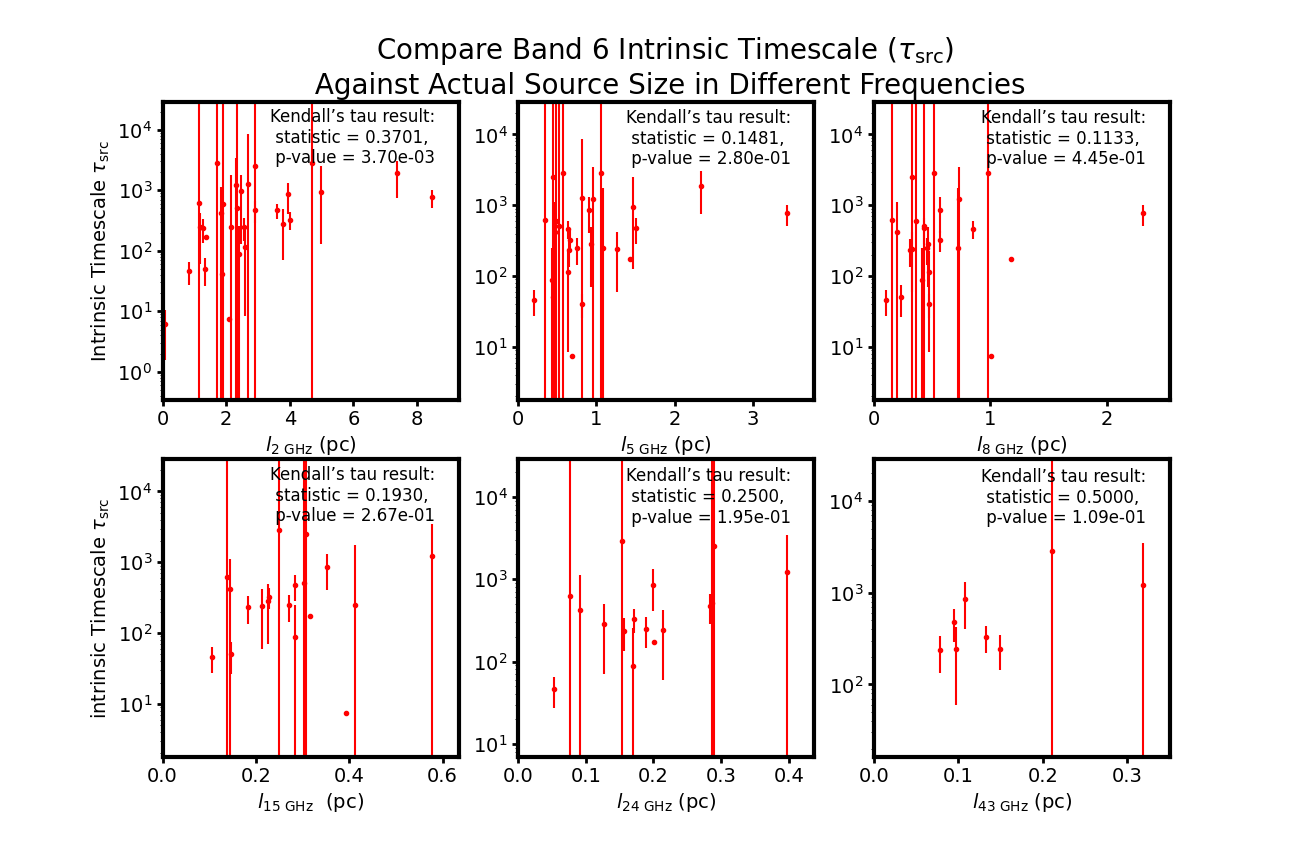

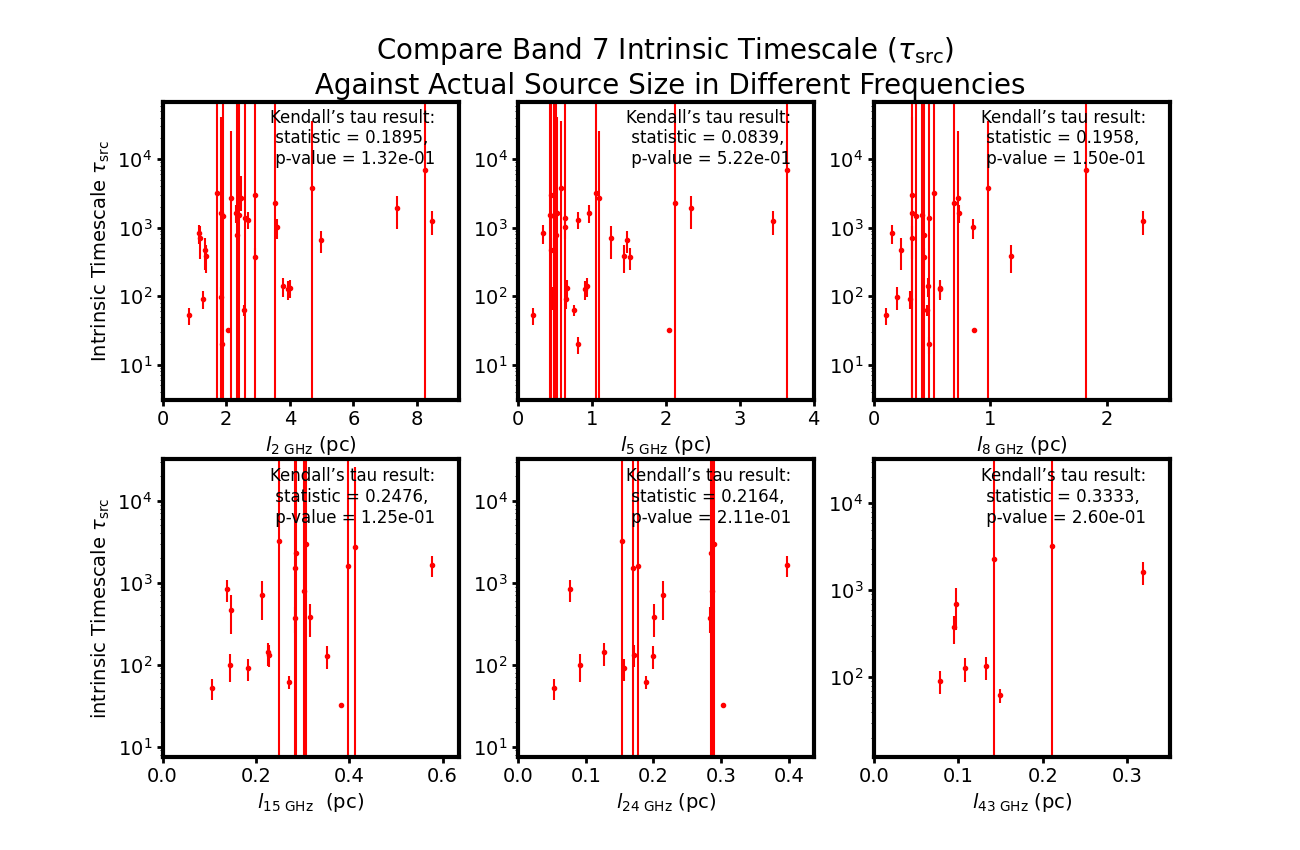

In [12]:
#######################################################################################################
### tau_src vs actual source size scattering plot
#######################################################################################################

tausrc = [tausrc_3, tausrc_6, tausrc_7]
tausrc_uperr = [tausrc_uperr_3, tausrc_uperr_6, tausrc_uperr_7]
tausrc_lowerr = [tausrc_lowerr_3, tausrc_lowerr_6, tausrc_lowerr_7]
Band_num = [3, 6, 7]

for k in range(0, 3):
    
    up_err = [ tausrc_uperr[k]-tausrc[k] ]
    low_err = [ tausrc[k]-tausrc_lowerr[k] ]
    y_err = np.array(list(zip(np.array(low_err) ,np.array(up_err)))).T

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_2)
    notnan = np.where(aa == True)[0]
    
    act_size2 = act_size_2[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size2, notnan_tausrc)
    
    axs[0, 0].plot(act_size2, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size2)):
        axs[0, 0].errorbar(act_size2[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xlim(0, np.nanmax(act_size2)*1.1)
    axs[0, 0].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[0, 0].text(np.nanmax(act_size2)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 0].set(xlabel = '$l_\mathrm{2\ GHz}$ (pc)', ylabel = 'Intrinsic Timescale $\\tau_\mathrm{src}$')

    # 5 Ghz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_5)
    notnan = np.where(aa == True)[0]
    
    act_size5 = act_size_5[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size5, notnan_tausrc)
    
    axs[0, 1].plot(act_size5, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size5)):
        axs[0, 1].errorbar(act_size5[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")

    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xlim(0, np.nanmax(act_size5)*1.1)
    axs[0, 1].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[0, 1].set(xlabel = '$l_\mathrm{5\ GHz}$ (pc)')
    axs[0, 1].text(np.nanmax(act_size5)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 1].set_title('Compare Band %s Intrinsic Timescale ($\\tau_\mathrm{src}$) \n Against Actual Source Size in Different Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_8)
    notnan = np.where(aa == True)[0]
    
    act_size8 = act_size_8[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size8, notnan_tausrc)
    
    axs[0, 2].plot(act_size8, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size8)):
        axs[0, 2].errorbar(act_size8[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[0, 2].set_yscale('log')
    axs[0, 2].set_xlim(0, np.nanmax(act_size8)*1.1)
    axs[0, 2].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[0, 2].text(np.nanmax(act_size8)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[0, 2].set(xlabel = '$l_\mathrm{8\ GHz}$ (pc)')

    # 15 GHz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_15)
    notnan = np.where(aa == True)[0]
    
    act_size15 = act_size_15[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size15, notnan_tausrc)
    
    axs[1, 0].plot(act_size15, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size15)):
        axs[1, 0].errorbar(act_size15[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[1, 0].set_yscale('log')
    axs[1, 0].set_xlim(0, np.nanmax(act_size15)*1.1)
    axs[1, 0].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[1, 0].text(np.nanmax(act_size15)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 0].set(xlabel = '$l_\mathrm{15\ GHz}\ $ (pc)', ylabel = 'intrinsic Timescale $\\tau_\mathrm{src}$')

    # 24 Ghz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_24)
    notnan = np.where(aa == True)[0]
    
    act_size24 = act_size_24[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size24, notnan_tausrc)
    
    axs[1, 1].plot(act_size24, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size24)):
        axs[1, 1].errorbar(act_size24[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[1, 1].set_yscale('log')
    axs[1, 1].set_xlim(0, np.nanmax(act_size24)*1.1)
    axs[1, 1].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[1, 1].text(np.nanmax(act_size24)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 1].set(xlabel = '$l_\mathrm{24\ GHz}$ (pc)')

    # 43 GHz 
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_43)
    notnan = np.where(aa == True)[0]
    
    act_size43 = act_size_43[notnan]
    notnan_tausrc = tausrc[k][notnan]
    
    tau, p = stats.kendalltau(act_size43, notnan_tausrc)
    
    axs[1, 2].plot(act_size43, notnan_tausrc, '.', c = 'red', markersize = 6)
    for i in range(0, len(act_size43)):
        axs[1, 2].errorbar(act_size43[i], notnan_tausrc[i], yerr = y_err[notnan][i], ecolor = "red")
    
    axs[1, 2].set_yscale('log')
    axs[1, 2].set_xlim(0, np.nanmax(act_size43)*1.1)
    axs[1, 2].set_ylim(0, np.nanmax(notnan_tausrc)*10)
    axs[1, 2].text(np.nanmax(act_size43)*0.4, np.nanmax(notnan_tausrc)*8, 'Kendall’s tau result: \n statistic = %6.4f,\n p-value = %.2e' %(tau, p), verticalalignment = 'top', fontsize = 12)
    axs[1, 2].set(xlabel = '$l_\mathrm{43\ GHz}$ (pc)')




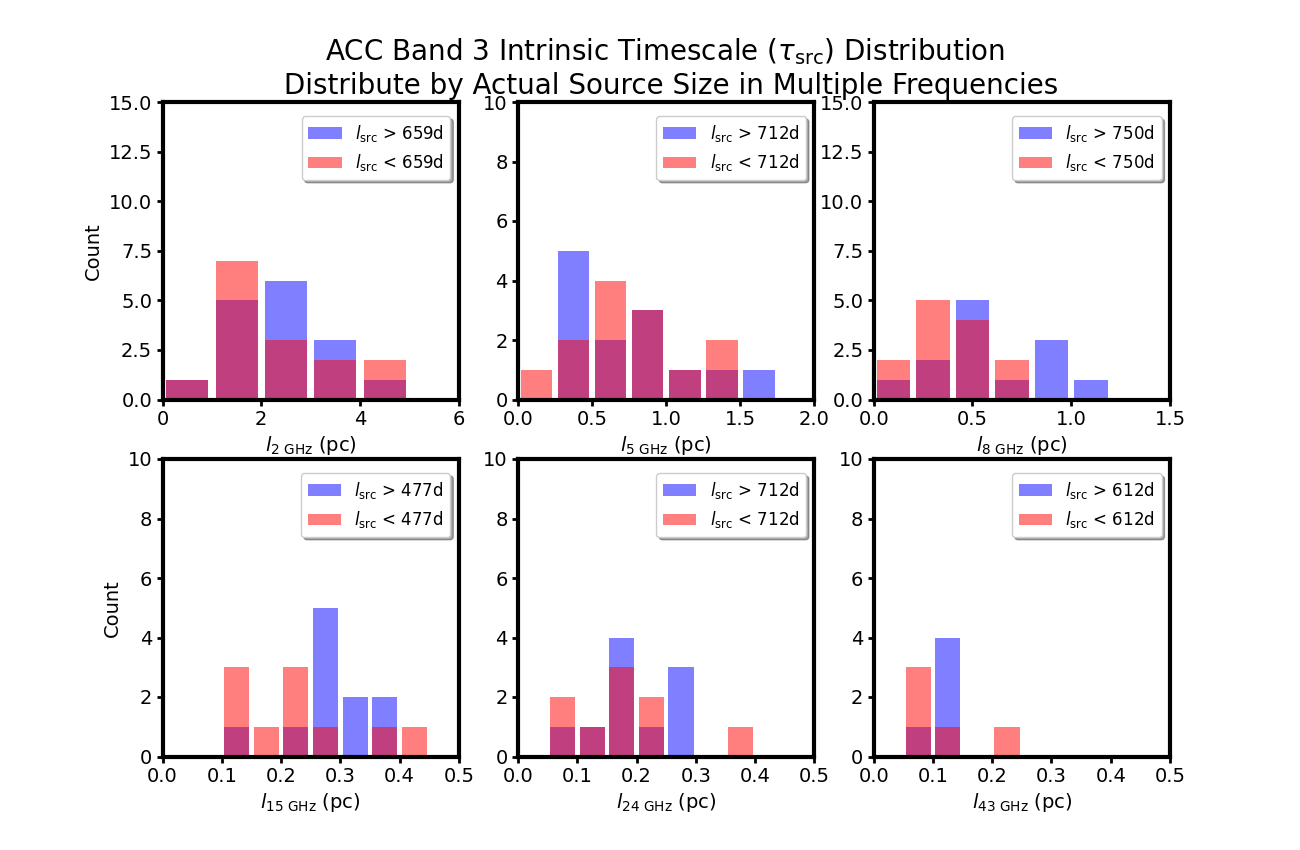

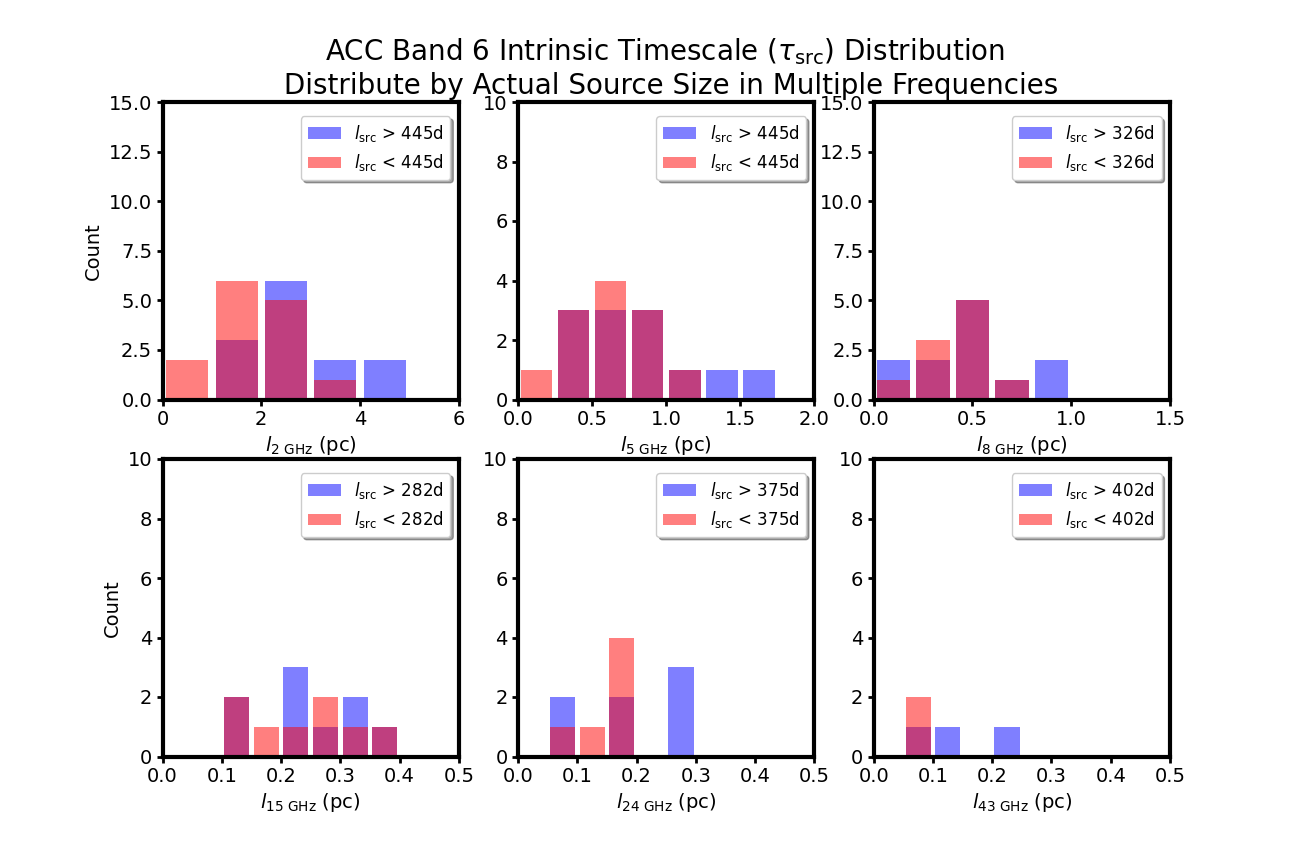

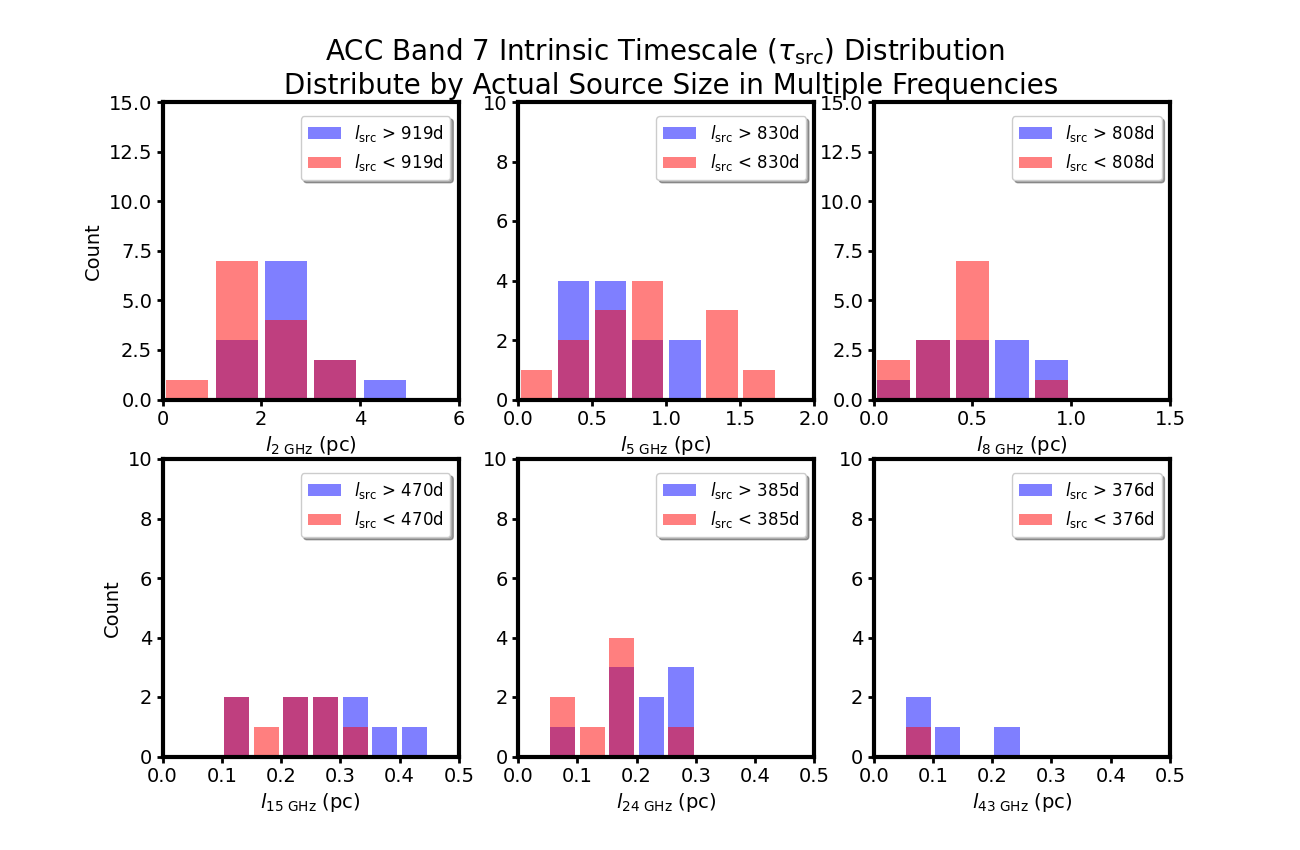

In [32]:
#######################################################################################################
### tau_src vs actual source size histogram 
#######################################################################################################

tausrc = [tausrc_3, tausrc_6, tausrc_7]
Band_num = [3, 6, 7]

for k in range(0, 3):

    plt.rcParams['figure.figsize'] = [13, 8.5]
    plt.rcParams['axes.linewidth'] = 3
    plt.rc('font', size = 14)    
    mpl.rcParams['xtick.major.size'] = 4
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 4
    mpl.rcParams['ytick.major.width'] = 2
    #fig = plt.figure()
    #gs = fig.add_gridspec(2, 3)
    fig, axs = plt.subplots(2, 3) # , sharey='row'

    # 2 GHz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_2)
    notnan = np.where(aa == True)[0]
    
    act_size2 = act_size_2[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
   
    n, bins, p = axs[0, 0].hist(act_size2[gt_median], bins = np.arange(0., np.nanmax(act_size2[gt_median]), 1), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[0, 0].hist(act_size2[lt_median], bins = np.arange(0., np.nanmax(act_size2[lt_median]), 1), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    axs[0, 0].set_xlim(0, 6)
    axs[0, 0].set_ylim(0, 15)
    axs[0, 0].set(xlabel = '$l_\mathrm{2\ GHz}$ (pc)', ylabel = 'Count')

    # 5 Ghz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_5)
    notnan = np.where(aa == True)[0]
    
    act_size5 = act_size_5[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
    
    n, bins, p = axs[0, 1].hist(act_size5[gt_median], bins = np.arange(0., np.nanmax(act_size5[gt_median]), 0.25), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[0, 1].hist(act_size5[lt_median], bins = np.arange(0., np.nanmax(act_size5[lt_median]), 0.25), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )

    axs[0, 1].set_xlim(0, 2)
    axs[0, 1].set_ylim(0, 10)
    axs[0, 1].set(xlabel = '$l_\mathrm{5\ GHz}$ (pc)')
    axs[0, 1].set_title('ACC Band %s Intrinsic Timescale ($\\tau_\mathrm{src}$) Distribution \n Distribute by Actual Source Size in Multiple Frequencies' % str(Band_num[k]), fontsize = 20)

    # 8 GHz 
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_8)
    notnan = np.where(aa == True)[0]
    
    act_size8 = act_size_8[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
    
    n, bins, p = axs[0, 2].hist(act_size8[gt_median], bins = np.arange(0., np.nanmax(act_size8[gt_median]), 0.2), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[0, 2].hist(act_size8[lt_median], bins = np.arange(0., np.nanmax(act_size8[lt_median]), 0.2), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )

    axs[0, 2].set_xlim(0, 1.5)
    axs[0, 2].set_ylim(0, 15)
    axs[0, 2].set(xlabel = '$l_\mathrm{8\ GHz}$ (pc)')

    # 15 GHz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_15)
    notnan = np.where(aa == True)[0]
    
    act_size15 = act_size_15[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
    
    n, bins, p = axs[1, 0].hist(act_size15[gt_median], bins = np.arange(0., np.nanmax(act_size15[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[1, 0].hist(act_size15[lt_median], bins = np.arange(0., np.nanmax(act_size15[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )

    axs[1, 0].set_xlim(0, 0.5)
    axs[1, 0].set_ylim(0, 10)
    axs[1, 0].set(xlabel = '$l_\mathrm{15\ GHz}$ (pc)', ylabel = 'Count')

    # 24 Ghz
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_24)
    notnan = np.where(aa == True)[0]
    
    act_size24 = act_size_24[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
    
    n, bins, p = axs[1, 1].hist(act_size24[gt_median], bins = np.arange(0., np.nanmax(act_size24[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[1, 1].hist(act_size24[lt_median], bins = np.arange(0., np.nanmax(act_size24[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )

    axs[1, 1].set_xlim(0, 0.5)
    axs[1, 1].set_ylim(0, 10)
    axs[1, 1].set(xlabel = '$l_\mathrm{24\ GHz}$ (pc)')

    # 43 GHz 
    aa = ~np.isnan(tausrc[k]) & ~np.isnan(act_size_43)
    notnan = np.where(aa == True)[0]
    
    act_size43 = act_size_43[notnan]
    notnan_tauchar = tausrc[k][notnan]
    
    gt_median = np.where( (tausrc[k][notnan] > np.nanmedian(tausrc[k][notnan])) | (tausrc[k][notnan] == np.nanmedian(tausrc[k][notnan])))[0]
    lt_median = np.where( tausrc[k][notnan] < np.nanmedian(tausrc[k][notnan]))[0]
    
    n, bins, p = axs[1, 2].hist(act_size43[gt_median], bins = np.arange(0., np.nanmax(act_size43[gt_median]), 0.05), density=0,
                                color = 'blue', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ > %3.0fd' % np.nanmedian(tausrc[k][notnan]) )
    
    n, bins, p = axs[1, 2].hist(act_size43[lt_median], bins = np.arange(0., np.nanmax(act_size43[lt_median]), 0.05), density=0,
                                color = 'red', alpha = 0.5, rwidth=0.85, label = '$l_\mathrm{src}$ < %3.0fd' % np.nanmedian(tausrc[k][notnan]) )

    axs[1, 2].set_xlim(0, 0.5)
    axs[1, 2].set_ylim(0, 10)
    axs[1, 2].set(xlabel = '$l_\mathrm{43\ GHz}$ (pc)')
    
    for i in range(0, 2):
        for k in range(0, 3):
            axs[i, k].legend(loc = 'upper right', bbox_to_anchor = (1.0, 0.98), shadow=True, fontsize = 12, markerscale = 2) 
